In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import time
import ctypes
import os

MAX_DIMENSIONS = 2
MAX_ITER = 500
times = []
POP_SIZE = 50

TESTS_AMOUNT = 10
times_py = []

# Реализация на Python с использованием Numba

In [2]:
@jit(nopython=True)
def de_optimizer(objective_function, bounds, pop_size=POP_SIZE, max_iter=MAX_ITER, F=0.8, CR=0.9):
    """
    Differential Evolution optimizer
    """
    n_dims = len(bounds)
    # Initialize population
    population = np.zeros((pop_size, n_dims))
    for i in range(pop_size):
        for j in range(n_dims):
            population[i, j] = bounds[j, 0] + np.random.rand()*(bounds[j, 1] - bounds[j, 0])
    # Evaluate initial population
    scores = np.zeros(pop_size)
    for i in range(pop_size):
        scores[i] = objective_function(population[i])
    # Find best individual in initial population
    best_idx = np.argmin(scores)
    best = population[best_idx]

    # Initialize performance graph data
    performance = []

    # Main loop
    for i in range(max_iter):
        # Generate new population
        v = rand_1_bin(population, F, CR)
        # Evaluate new population
        new_scores = np.zeros(pop_size)
        for j in range(pop_size):
            new_scores[j] = objective_function(v[j])
        # Replace old population with new population if better
        for j in range(pop_size):
            if new_scores[j] < scores[j]:
                population[j] = v[j]
                scores[j] = new_scores[j]
        # Update best individual
        new_best_idx = np.argmin(scores)
        if scores[new_best_idx] < scores[best_idx]:
            best_idx = new_best_idx
            best = population[best_idx]

        # Record the best score in this iteration for performance graph
        performance.append(scores[best_idx])

    return best, scores[best_idx], performance

In [3]:
@jit(nopython=True)
def rand_1_bin(population, F, CR):
    """
    rand/1/bin DE variant
    """
    n = population.shape[0]
    D = population.shape[1]
    v = np.zeros((n, D))
    for i in range(n):
        # Select three different individuals at random
        idxs = np.random.choice(n, 3, replace=False)
        a, b, c = population[idxs]
        # Generate mutant vector
        mutant = a + F*(b - c)
        # Generate trial vector
        jrand = np.random.randint(D)
        trial = np.zeros(D)
        # Select trial vector between mutant or just from population
        for j in range(D):
            if np.random.rand() < CR or j == jrand:
                trial[j] = mutant[j]
            else:
                trial[j] = population[i, j]
        v[i] = trial
    return v

In [4]:
# Add a performance function to calculate and return the time taken for optimization
def performance_function(func, *args, **kwargs):
    start_time = time.perf_counter()
    result = func(*args, **kwargs)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    return result, elapsed_time

In [5]:
def plot_performance(performance):
    plt.plot(performance)
    plt.xlabel("Iterations")
    plt.ylabel("Best score")
    plt.show()

In [6]:
def draw_distribution_graphic(best_values, tests_number, function_name):
    x = np.array([i for i in range(1, tests_number + 1)])
    plt.title("Distribution of " + function_name)
    plt.xlabel("Test number")
    plt.ylabel("Best found value")
    plt.scatter(x, best_values, c="blue")
    average = np.average(best_values)
    dispersion = np.sqrt(np.var(best_values))
    average_list = [average for i in range(1, tests_number + 1)]
    plt.plot(x, average_list, c="red")
    plt.fill_between(x, average_list - dispersion, average_list + dispersion, color="red", alpha=0.2)
    plt.show()

# Функции для тестирования

In [7]:
@jit(nopython=True)
def rosenbrock_function(x):
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

Optimizing Rosenbrock function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [1. 1.], Best score: 0.00000, Time taken: 5.57662 seconds


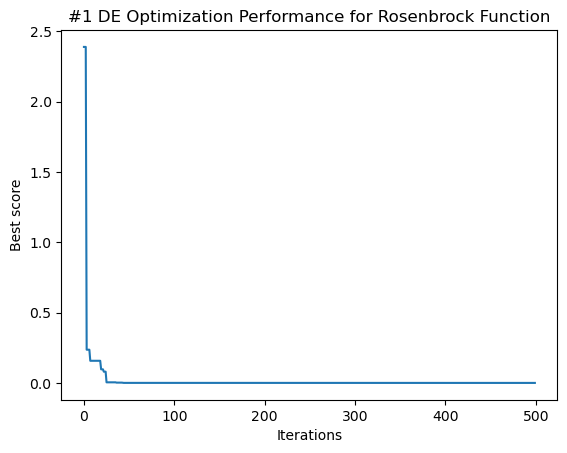

#2 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.04676 seconds


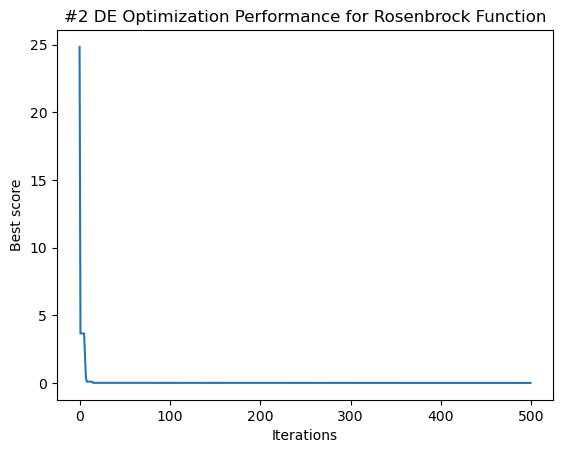

#3 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.04163 seconds


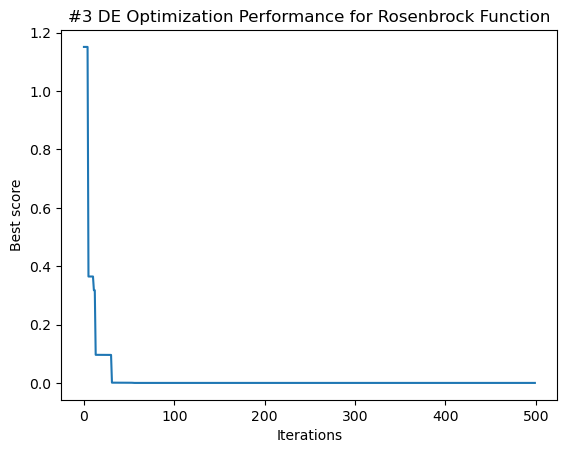

#4 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.05906 seconds


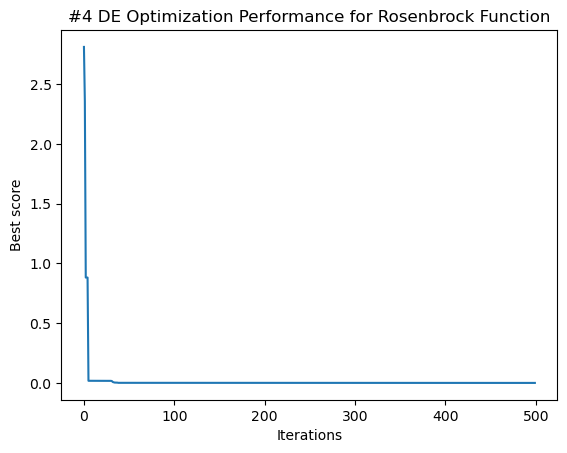

#5 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.03900 seconds


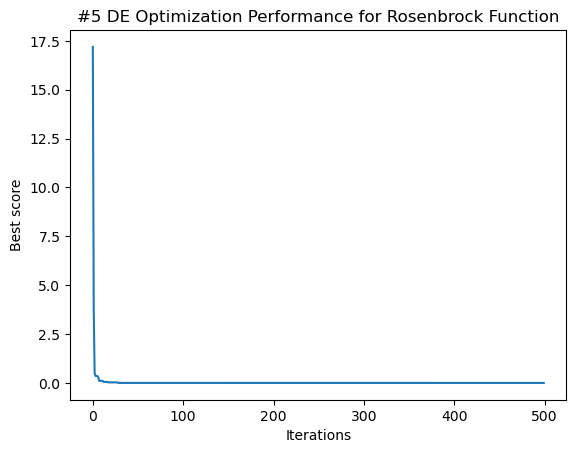

#6 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.04699 seconds


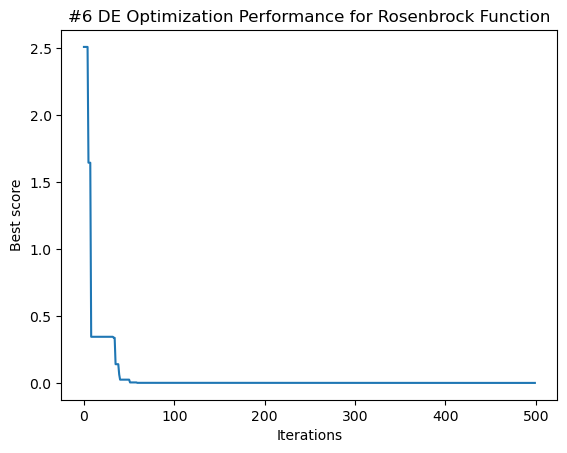

#7 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.06854 seconds


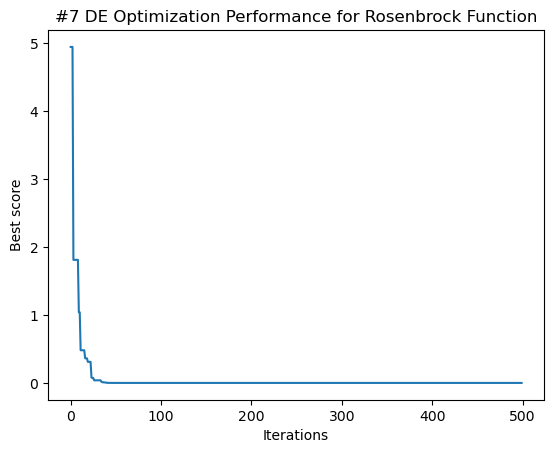

#8 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.05222 seconds


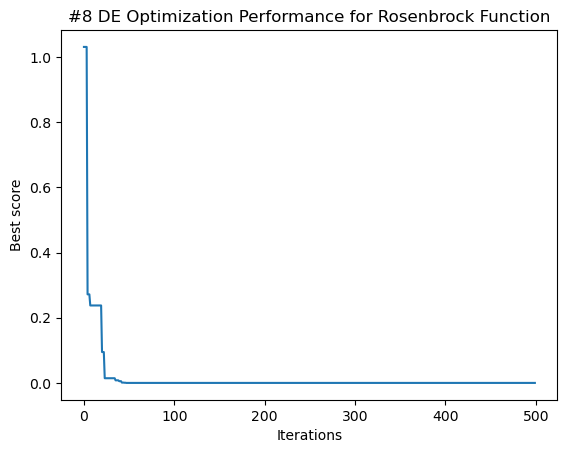

#9 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.04198 seconds


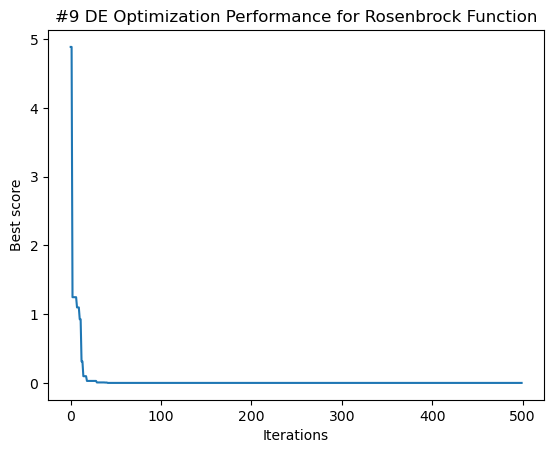

#10 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.03895 seconds


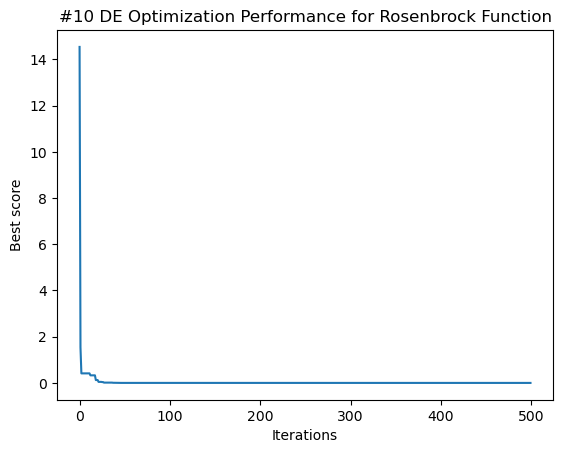

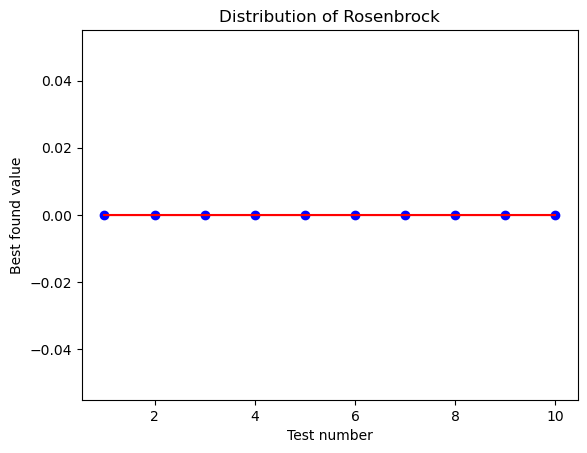

Dispersion is 0.0


In [8]:
# Optimize Rosenbrock function
print("Optimizing Rosenbrock function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, rosenbrock_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Rosenbrock Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Rosenbrock")
print("Dispersion is " + str(np.var(best_values)))

In [9]:
@jit(nopython=True)
def de_jong_function(x):
    return np.sum(x**2)

Optimizing De Jong (Sphere) function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [ 3.83961214e-40 -2.84113195e-40], Best score: 0.00000, Time taken: 1.72450 seconds


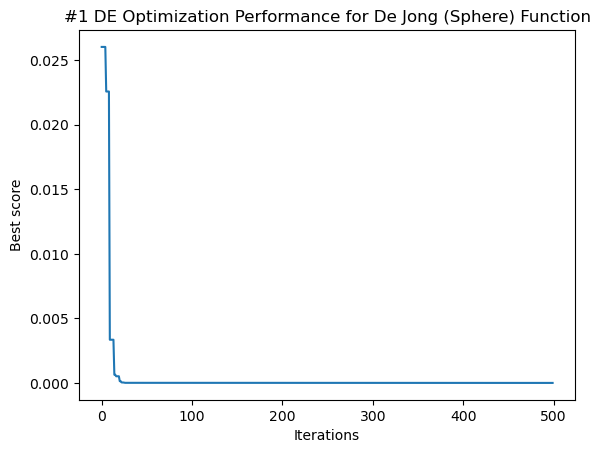

#2 Best solution: [6.44617397e-41 5.77451986e-41], Best score: 0.00000, Time taken: 0.04138 seconds


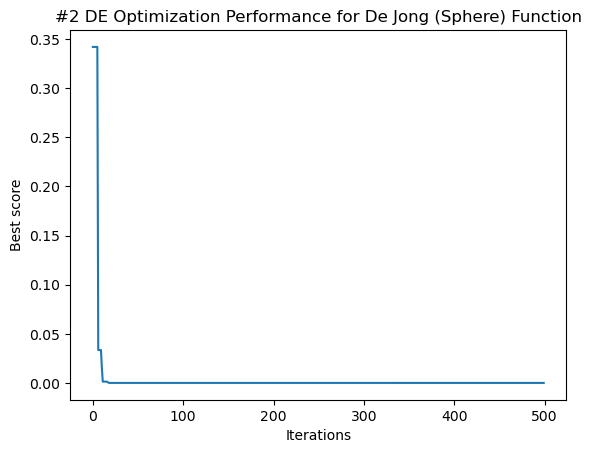

#3 Best solution: [2.87674748e-40 6.79177952e-40], Best score: 0.00000, Time taken: 0.03968 seconds


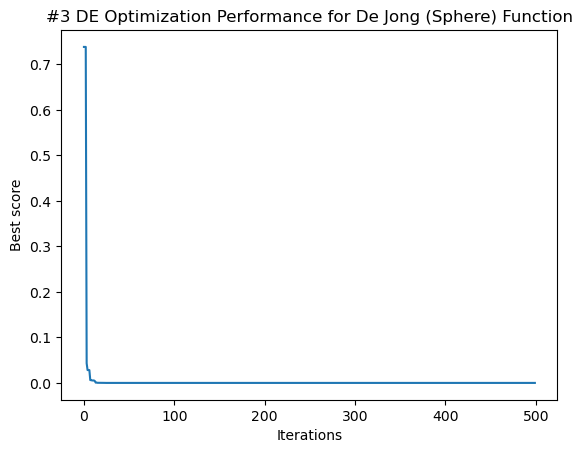

#4 Best solution: [1.09174975e-38 2.14408947e-40], Best score: 0.00000, Time taken: 0.03933 seconds


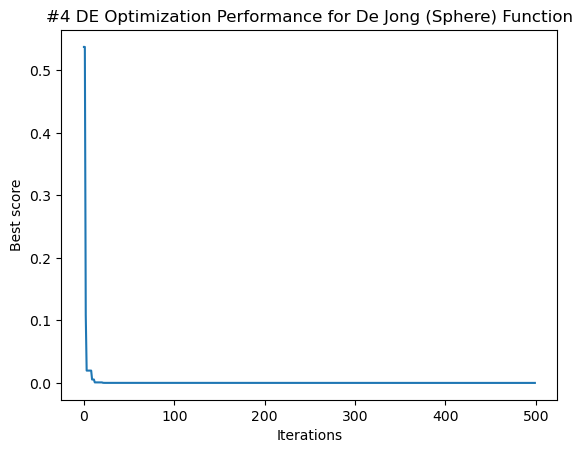

#5 Best solution: [5.41955347e-40 3.64660051e-40], Best score: 0.00000, Time taken: 0.06517 seconds


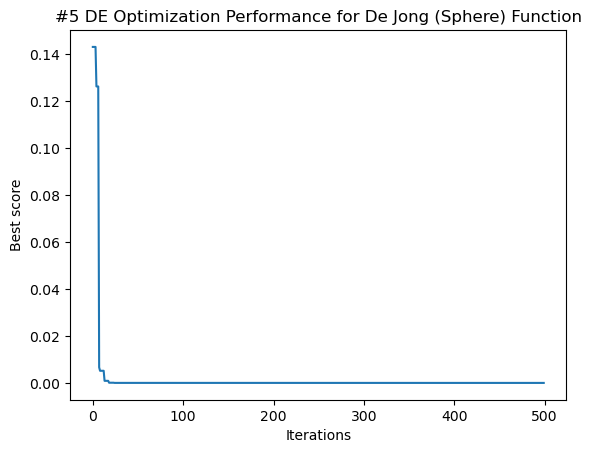

#6 Best solution: [5.54242733e-40 2.34061136e-40], Best score: 0.00000, Time taken: 0.03392 seconds


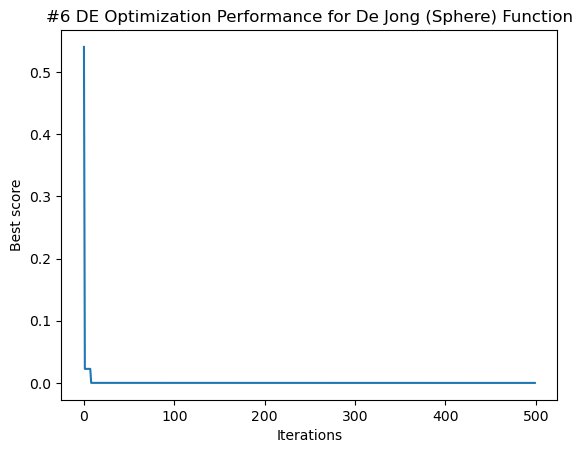

#7 Best solution: [2.25546709e-40 3.25644007e-40], Best score: 0.00000, Time taken: 0.06535 seconds


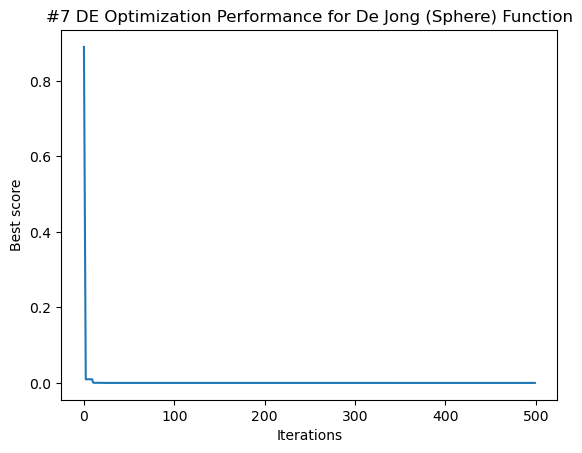

#8 Best solution: [-3.85505948e-40 -1.26191249e-40], Best score: 0.00000, Time taken: 0.03894 seconds


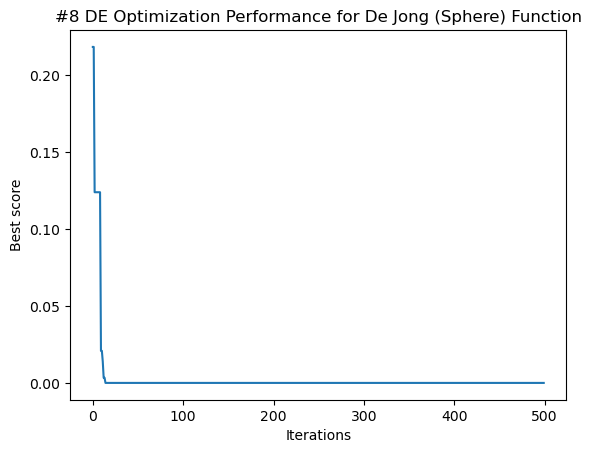

#9 Best solution: [ 1.11815033e-39 -2.24255914e-40], Best score: 0.00000, Time taken: 0.06505 seconds


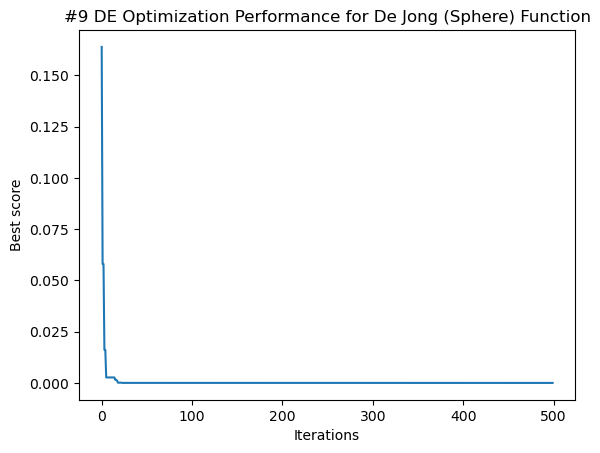

#10 Best solution: [-6.20660404e-40  6.19496932e-40], Best score: 0.00000, Time taken: 0.04821 seconds


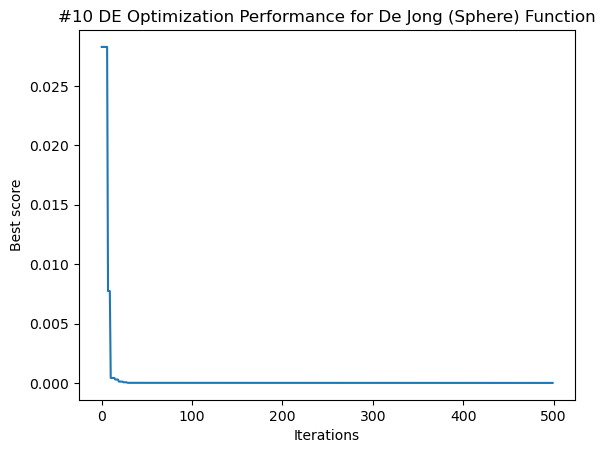

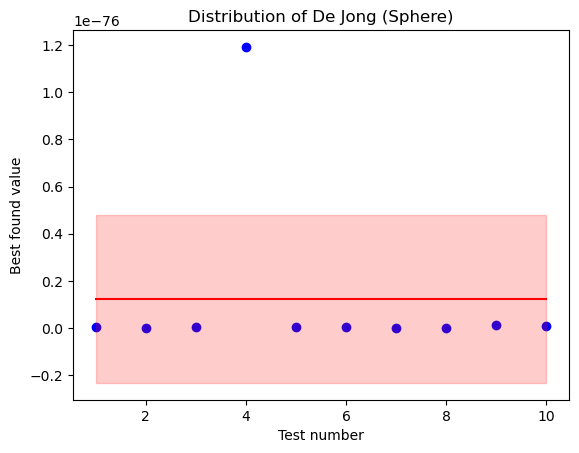

Dispersion is 1.2702878505683704e-153


In [10]:
# Optimize De Jong (Sphere) function
print("Optimizing De Jong (Sphere) function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, de_jong_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for De Jong (Sphere) Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "De Jong (Sphere)")
print("Dispersion is " + str(np.var(best_values)))

In [11]:
@jit(nopython=True)
def schwefel_function(x_ptr):
    x = np.clip(x_ptr, -500.0, 500.0)
    return np.sum(x * np.sin(np.sqrt(np.abs(x))))

Optimizing Schwefel function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [-420.96874612 -420.96874636], Best score: -837.96577, Time taken: 1.56444 seconds


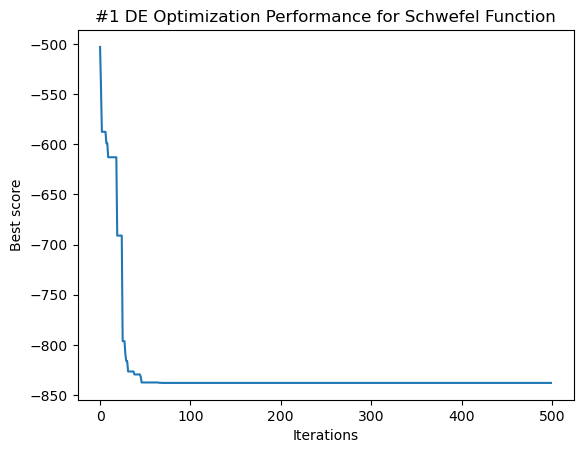

#2 Best solution: [-420.96874651 -420.9687462 ], Best score: -837.96577, Time taken: 0.04236 seconds


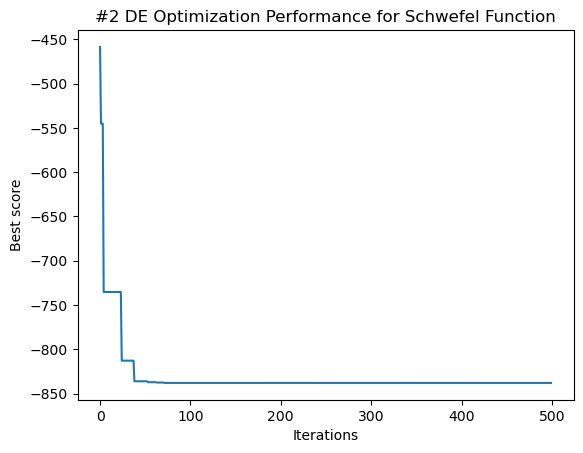

#3 Best solution: [-420.96874615 -420.9687468 ], Best score: -837.96577, Time taken: 0.05504 seconds


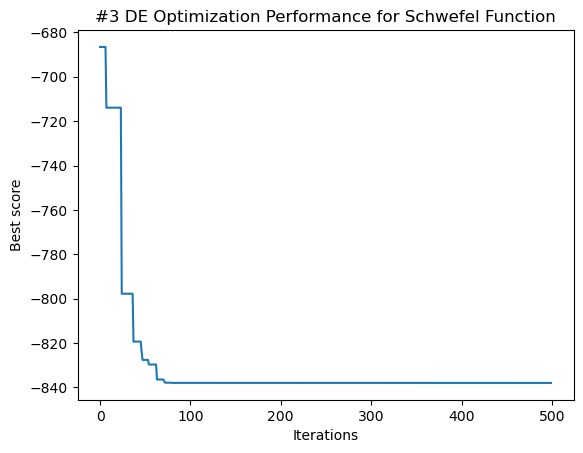

#4 Best solution: [-420.96874599 -420.96874625], Best score: -837.96577, Time taken: 0.05385 seconds


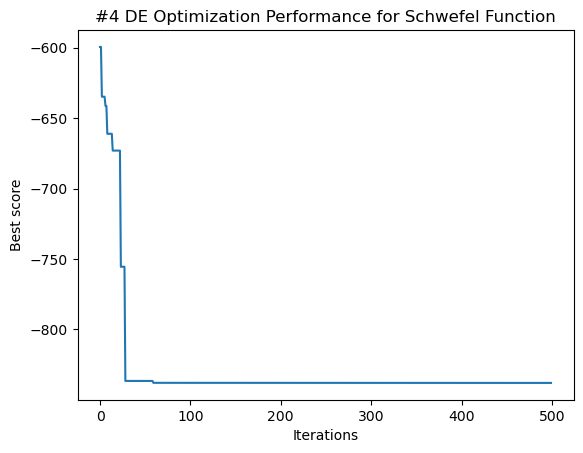

#5 Best solution: [-420.96874614 -420.96874624], Best score: -837.96577, Time taken: 0.05898 seconds


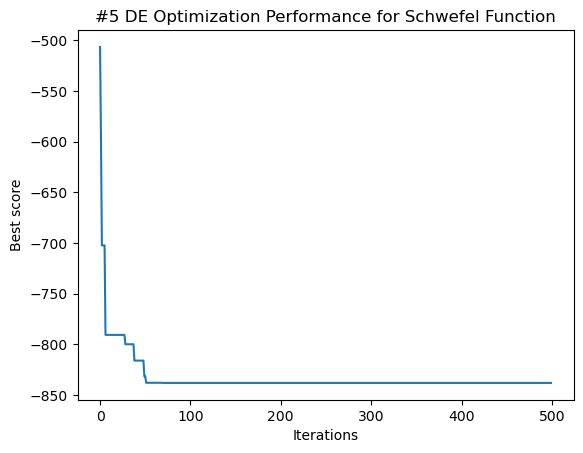

#6 Best solution: [-420.96874682 -420.96874628], Best score: -837.96577, Time taken: 0.07786 seconds


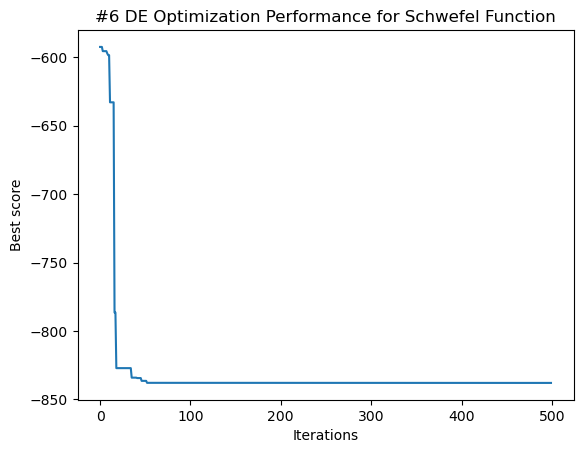

#7 Best solution: [-420.96874647 -420.96874657], Best score: -837.96577, Time taken: 0.04091 seconds


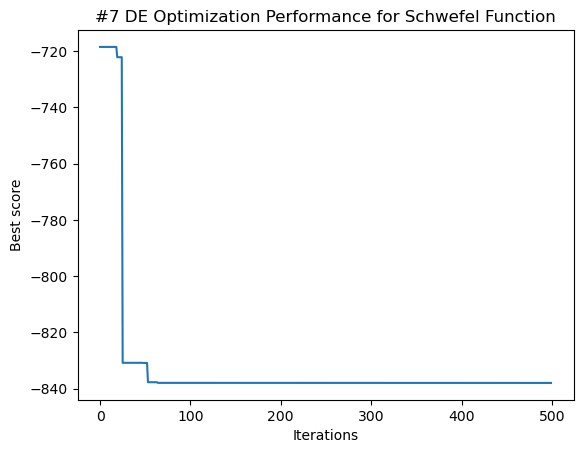

#8 Best solution: [-420.96874641 -420.96874697], Best score: -837.96577, Time taken: 0.04272 seconds


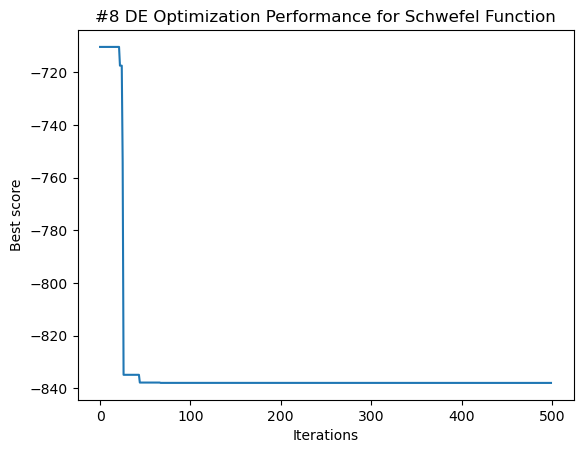

#9 Best solution: [-420.96874619 -420.96874627], Best score: -837.96577, Time taken: 0.05328 seconds


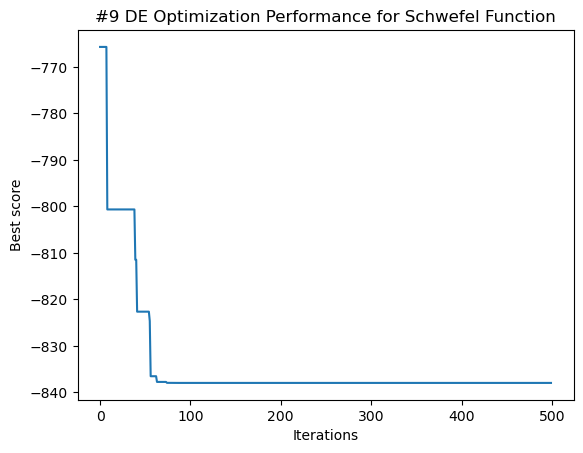

#10 Best solution: [-420.96874652 -420.96874641], Best score: -837.96577, Time taken: 0.06896 seconds


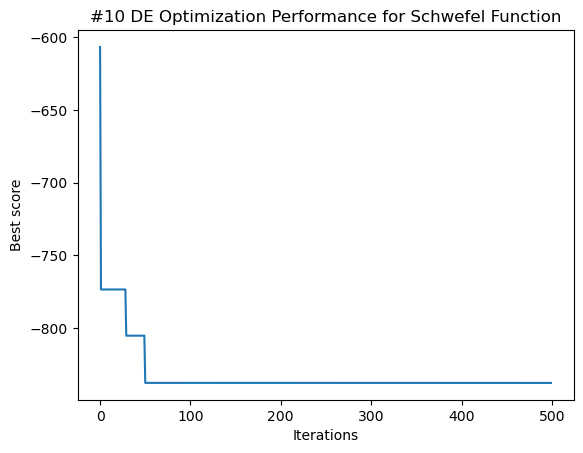

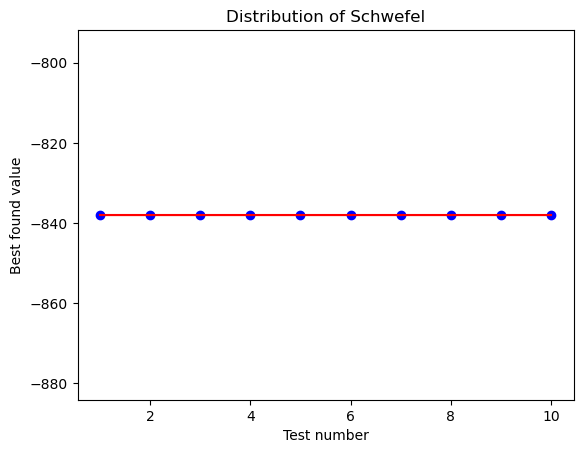

Dispersion is 0.0


In [12]:
# Optimize Schwefel function
print("Optimizing Schwefel function")
bounds = np.array([[-500, 500], [-500, 500]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, schwefel_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Schwefel Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Schwefel")
print("Dispersion is " + str(np.var(best_values)))

In [13]:
@jit(nopython=True)
def sum_of_different_powers_function(x):
    return np.sum(np.abs(x)**(np.arange(2, len(x) + 2)))

Optimizing Sum of different powers function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [ 9.99280681e-49 -2.30219942e-32], Best score: 0.00000, Time taken: 2.05530 seconds


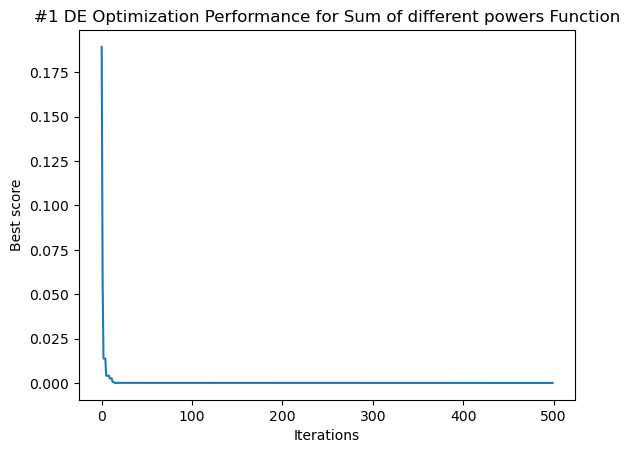

#2 Best solution: [2.66954887e-48 5.80473718e-33], Best score: 0.00000, Time taken: 0.06907 seconds


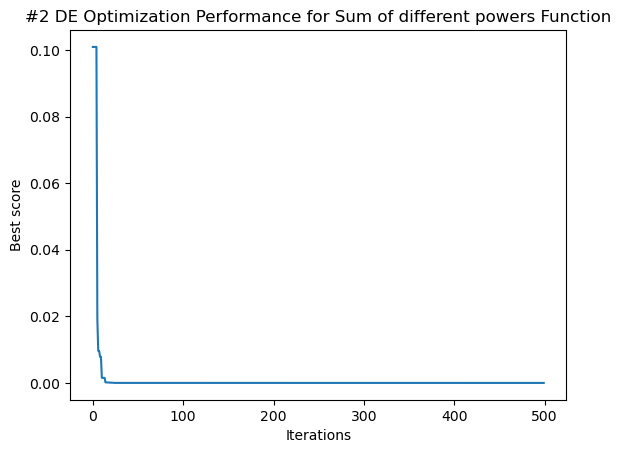

#3 Best solution: [-1.95632708e-48  2.99913194e-32], Best score: 0.00000, Time taken: 0.07680 seconds


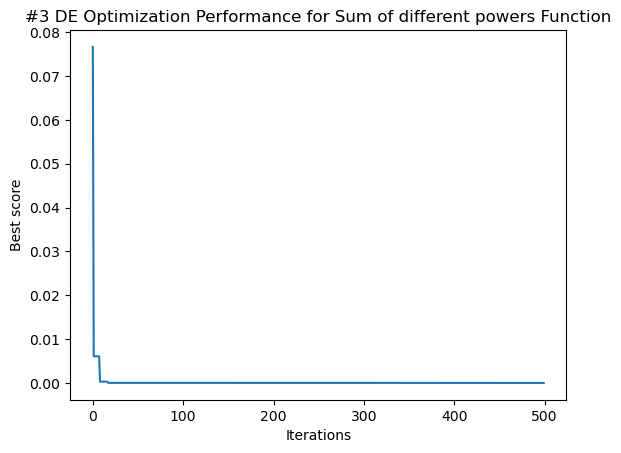

#4 Best solution: [-3.54553752e-47 -6.20191197e-33], Best score: 0.00000, Time taken: 0.05447 seconds


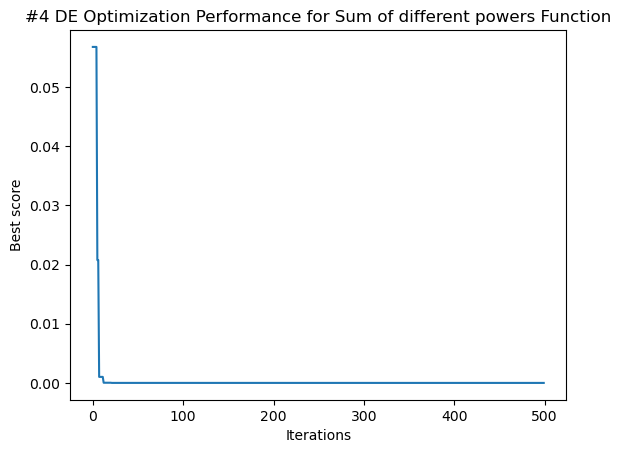

#5 Best solution: [-7.22967901e-48 -1.07410596e-32], Best score: 0.00000, Time taken: 0.04844 seconds


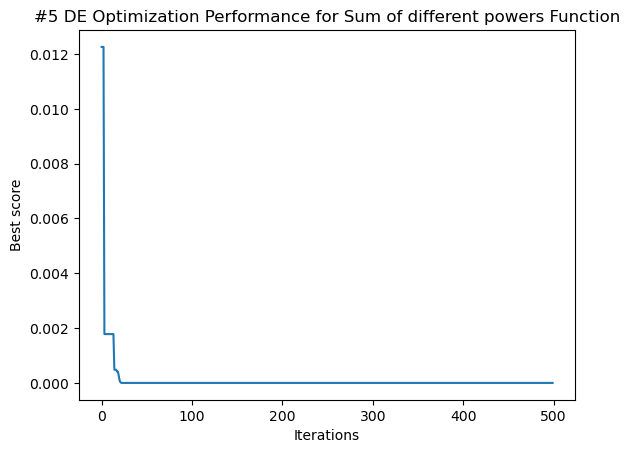

#6 Best solution: [-1.76577554e-48  3.97933993e-33], Best score: 0.00000, Time taken: 0.06533 seconds


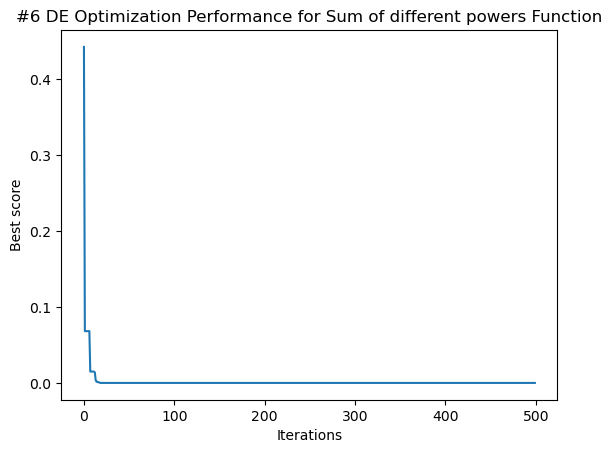

#7 Best solution: [-4.61065436e-48  1.50529741e-32], Best score: 0.00000, Time taken: 0.07177 seconds


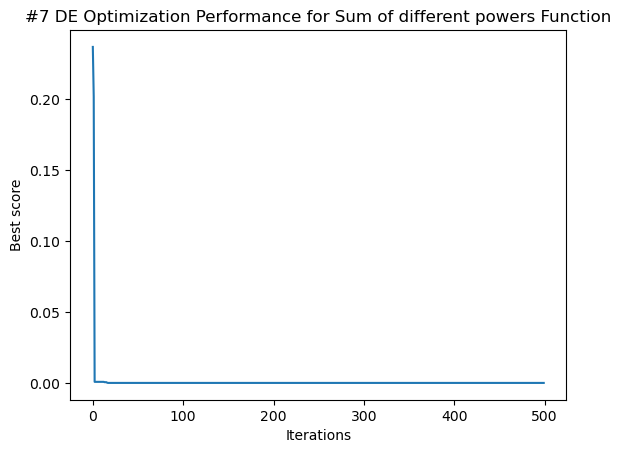

#8 Best solution: [-4.05235799e-48  1.82435371e-32], Best score: 0.00000, Time taken: 0.04332 seconds


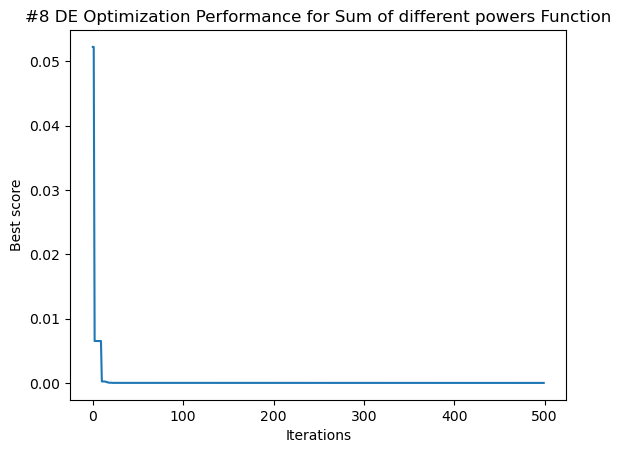

#9 Best solution: [-7.20699989e-48 -1.85601378e-31], Best score: 0.00000, Time taken: 0.04711 seconds


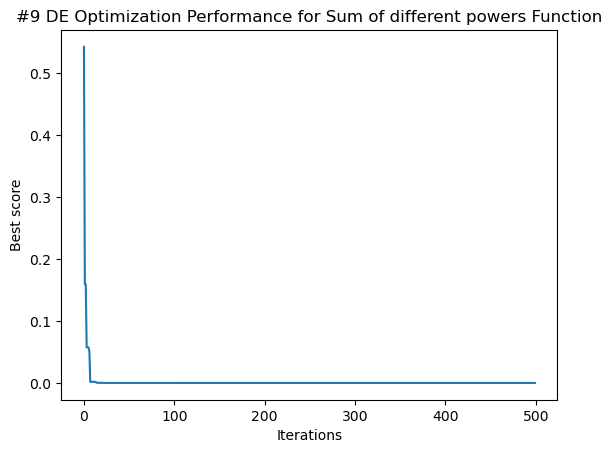

#10 Best solution: [ 2.48930034e-48 -2.23113277e-33], Best score: 0.00000, Time taken: 0.06274 seconds


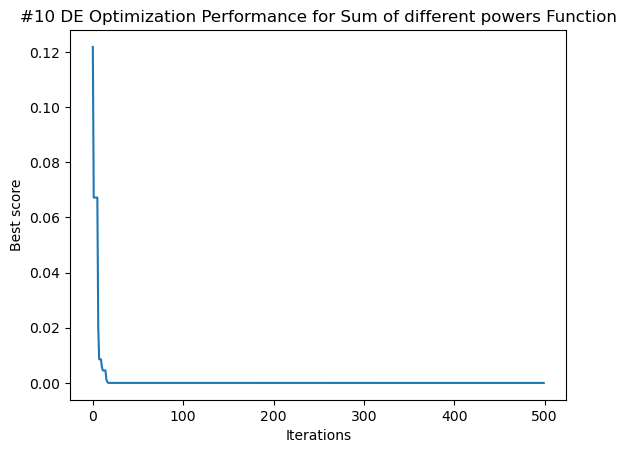

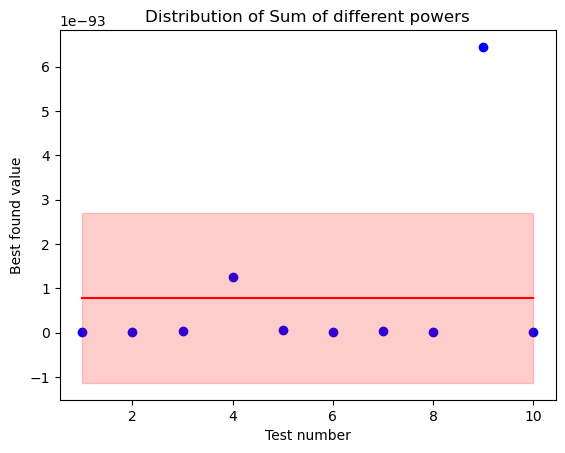

Dispersion is 3.6946107461925856e-186


In [14]:
# Optimize Sum of different powers function
print("Optimizing Sum of different powers function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, sum_of_different_powers_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Sum of different powers Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Sum of different powers")
print("Dispersion is " + str(np.var(best_values)))

In [15]:
@jit(nopython=True)
def booth_function(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

Optimizing Booth function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [1. 3.], Best score: 0.00000, Time taken: 1.65981 seconds


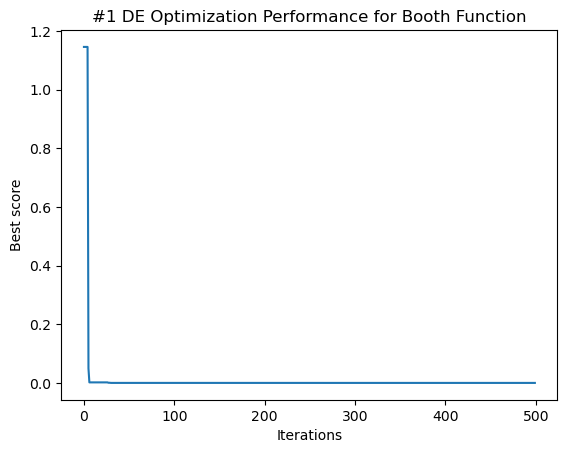

#2 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.03096 seconds


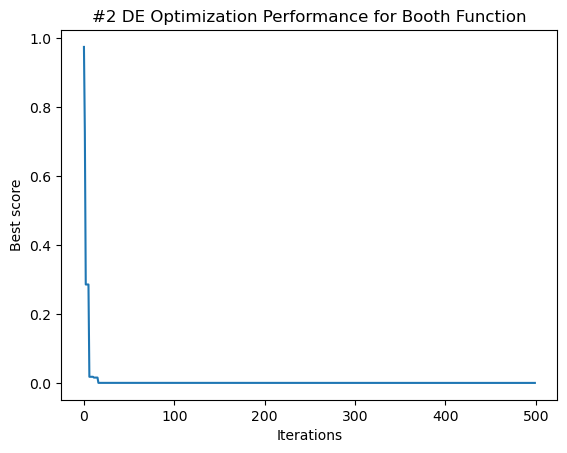

#3 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.03371 seconds


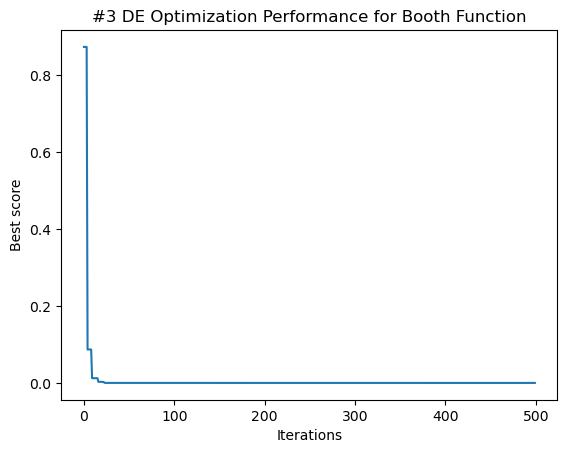

#4 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.05720 seconds


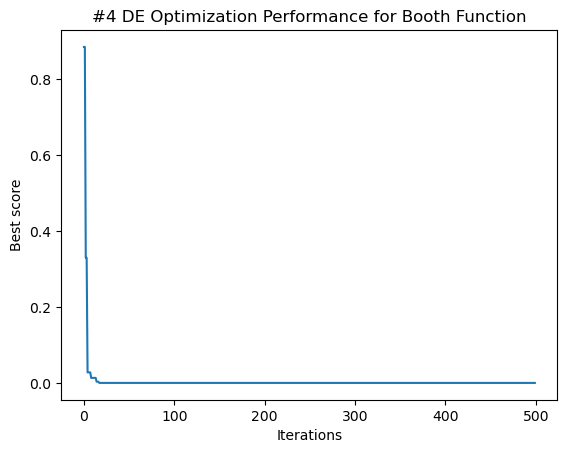

#5 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.05663 seconds


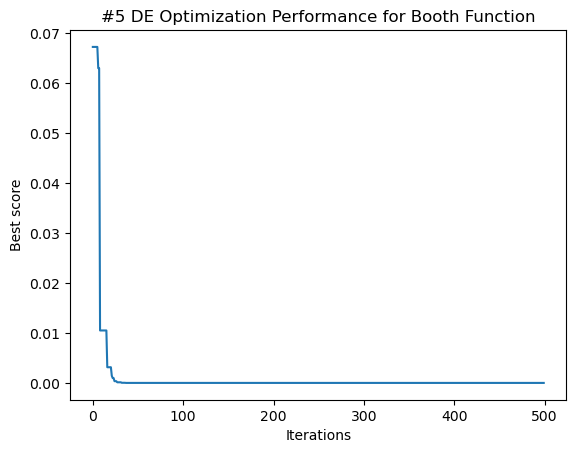

#6 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.03456 seconds


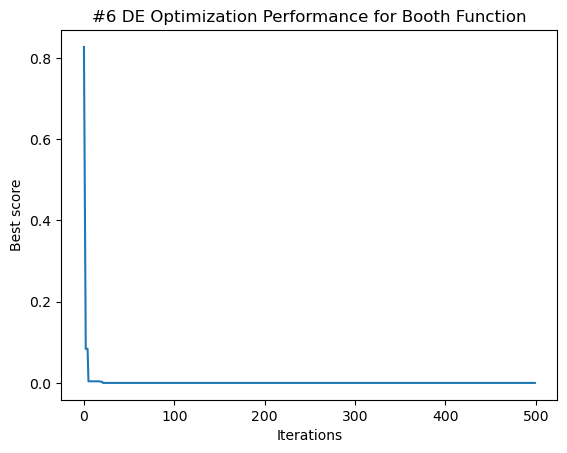

#7 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.04392 seconds


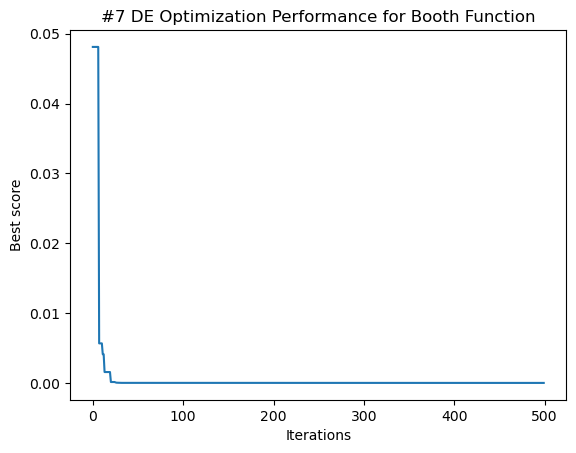

#8 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.03497 seconds


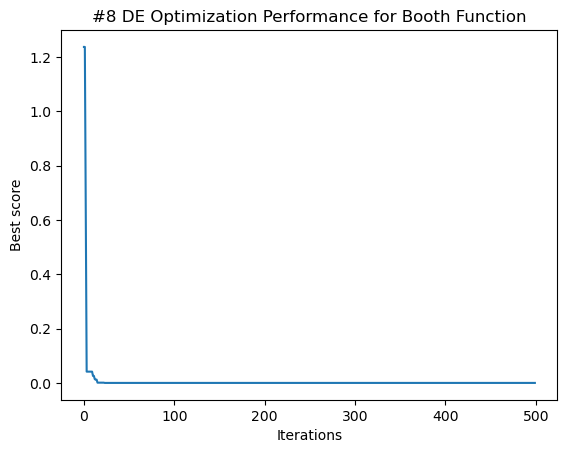

#9 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.03267 seconds


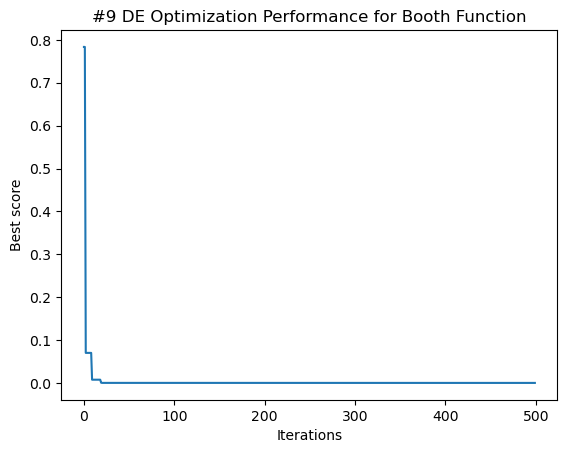

#10 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.03209 seconds


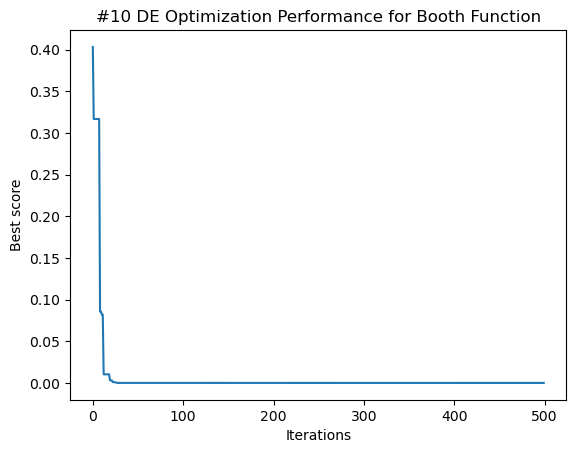

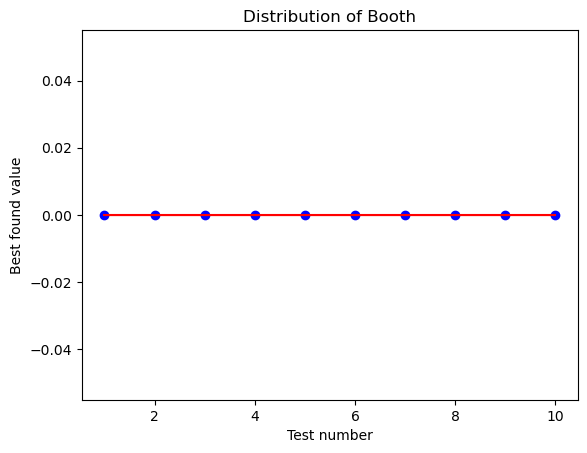

Dispersion is 0.0


In [16]:
# Optimize Booth function
print("Optimizing Booth function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, booth_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Booth Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Booth")
print("Dispersion is " + str(np.var(best_values)))

In [17]:
@jit(nopython=True)
def beale_function(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2

Optimizing Beale function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 1.43945 seconds


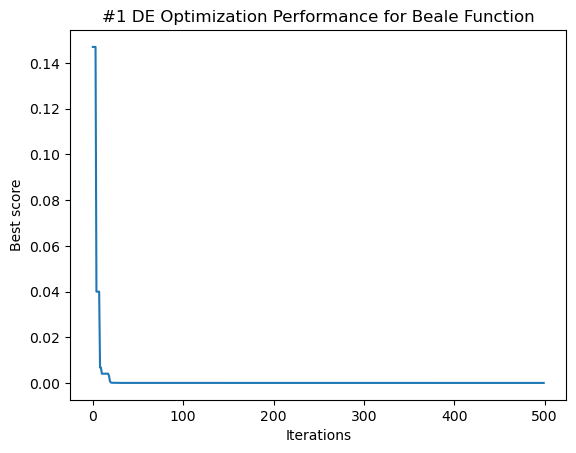

#2 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.03766 seconds


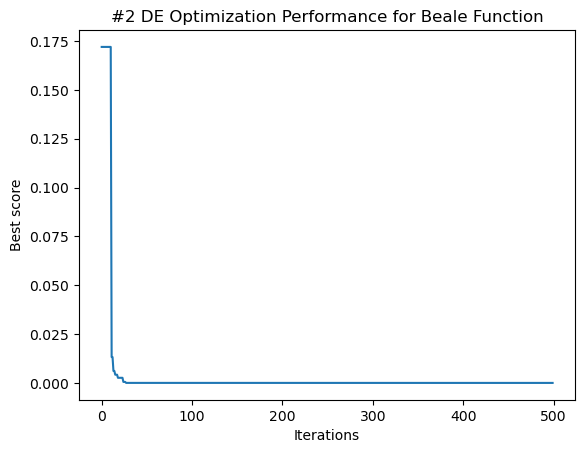

#3 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.03893 seconds


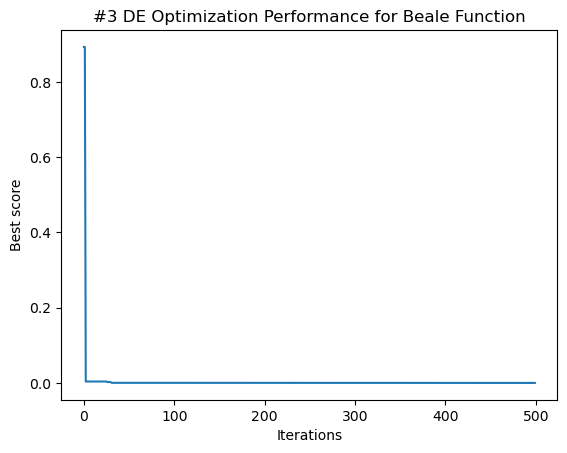

#4 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.06416 seconds


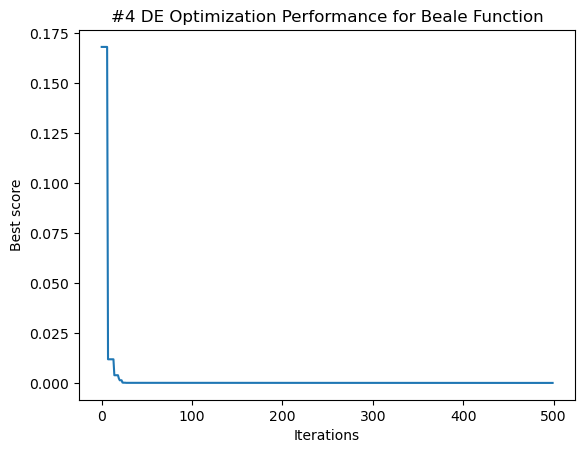

#5 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.05474 seconds


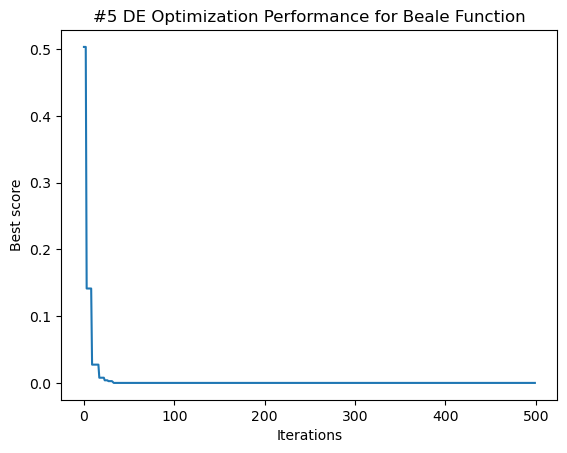

#6 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.03397 seconds


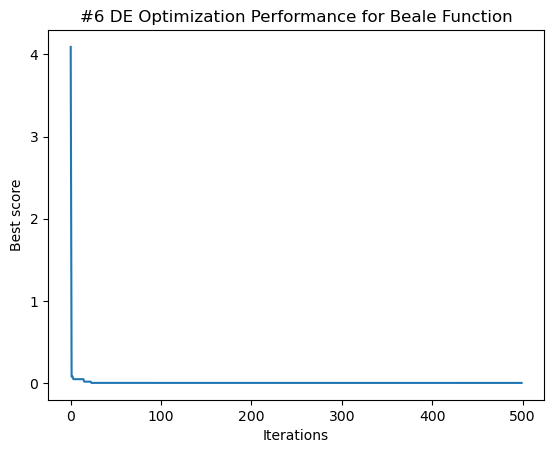

#7 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.03480 seconds


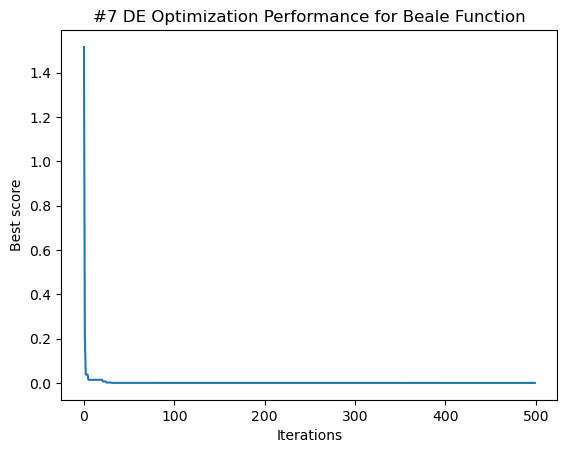

#8 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.05674 seconds


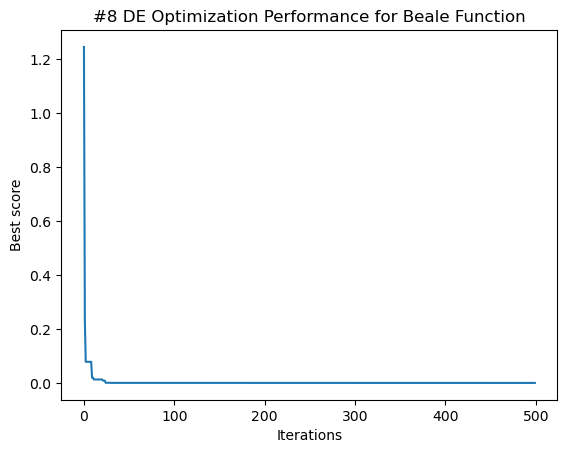

#9 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.05725 seconds


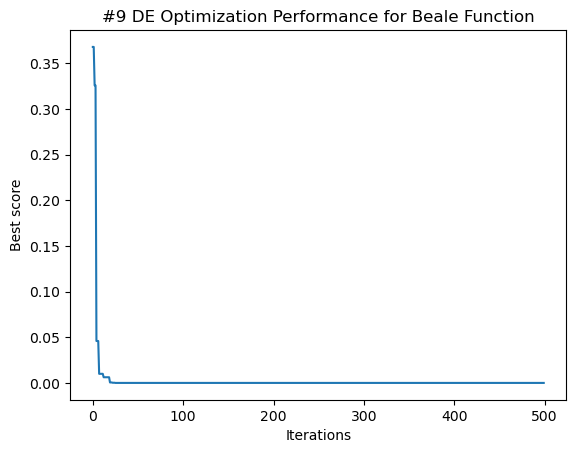

#10 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.03114 seconds


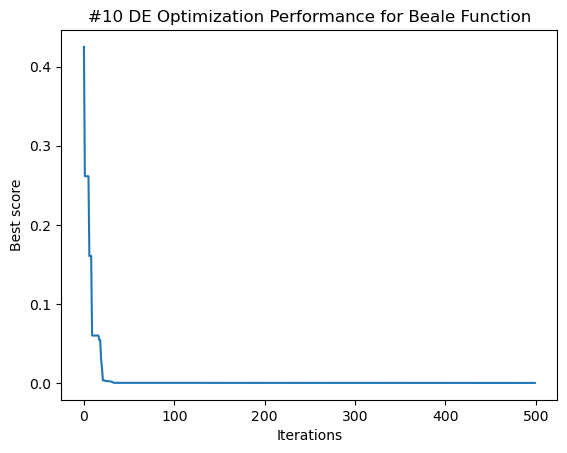

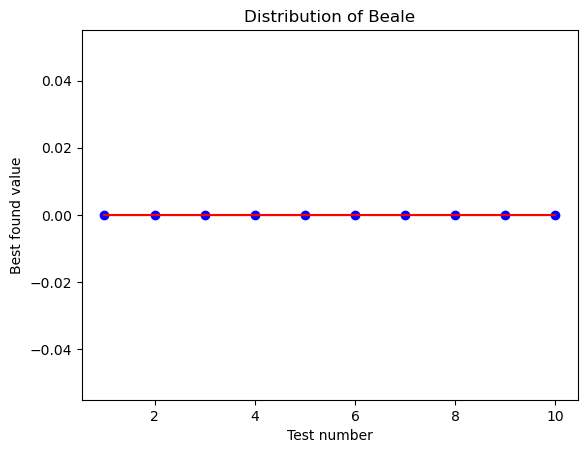

Dispersion is 0.0


In [18]:
# Optimize Beale function
print("Optimizing Beale function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, beale_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Beale Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Beale")
print("Dispersion is " + str(np.var(best_values)))

In [19]:
@jit(nopython=True)
def goldstein_price_function(x):
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2)) * (30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

Optimizing Goldstein-Price function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [-9.15326535e-10 -9.99999999e-01], Best score: 3.00000, Time taken: 1.54275 seconds


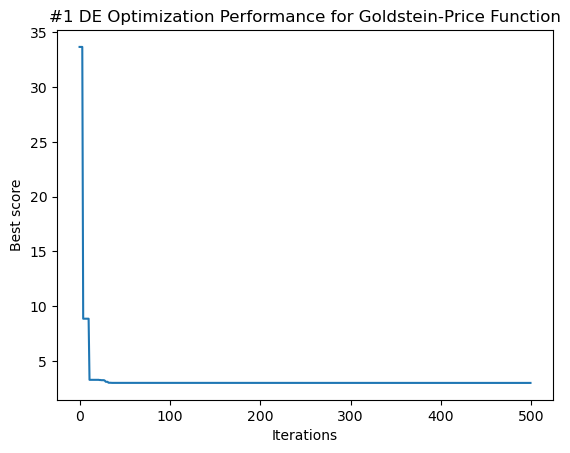

#2 Best solution: [-2.94388567e-10 -1.00000000e+00], Best score: 3.00000, Time taken: 0.04443 seconds


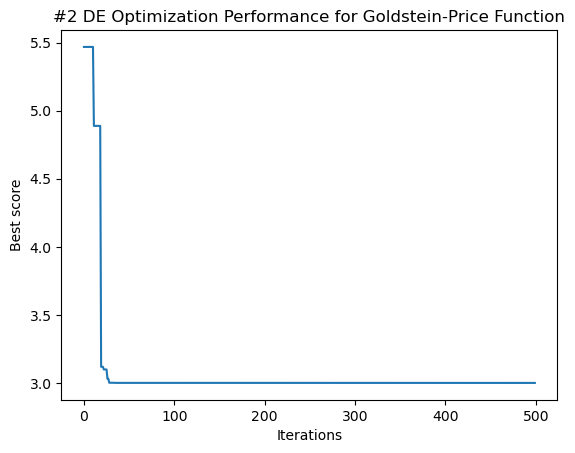

#3 Best solution: [-9.24093742e-10 -9.99999999e-01], Best score: 3.00000, Time taken: 0.04174 seconds


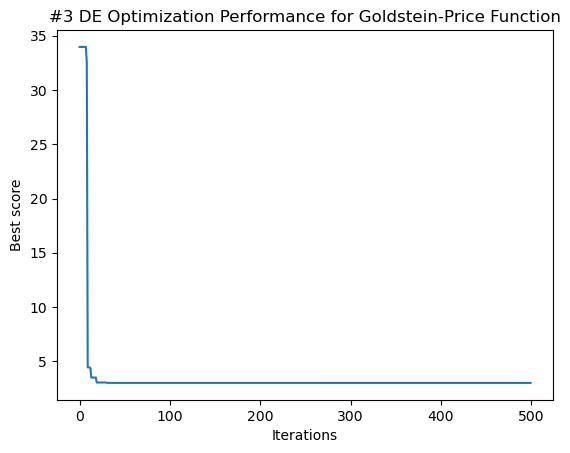

#4 Best solution: [-2.71213613e-09 -1.00000001e+00], Best score: 3.00000, Time taken: 0.05633 seconds


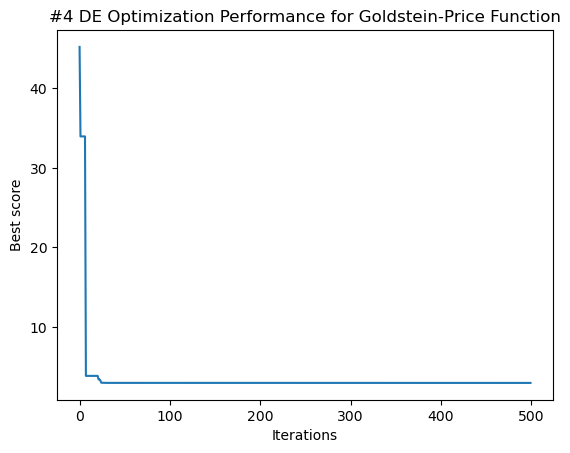

#5 Best solution: [ 4.84400912e-10 -9.99999999e-01], Best score: 3.00000, Time taken: 0.04732 seconds


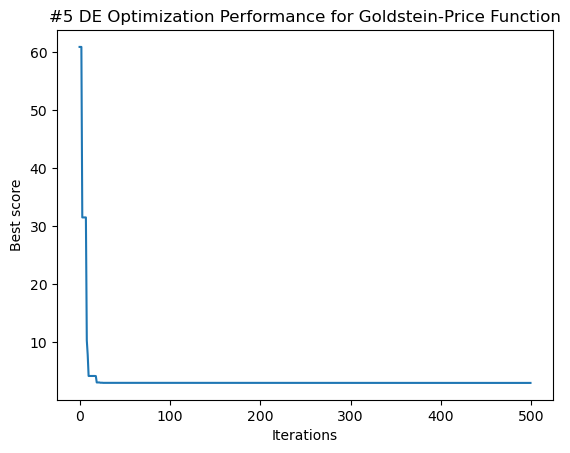

#6 Best solution: [-3.19405886e-10 -1.00000000e+00], Best score: 3.00000, Time taken: 0.04289 seconds


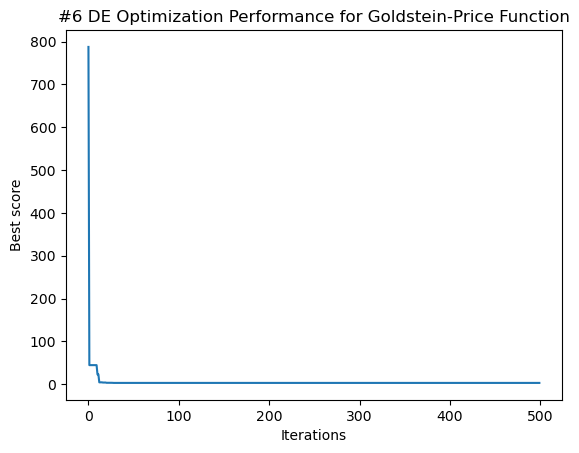

#7 Best solution: [ 2.07868337e-10 -1.00000000e+00], Best score: 3.00000, Time taken: 0.03512 seconds


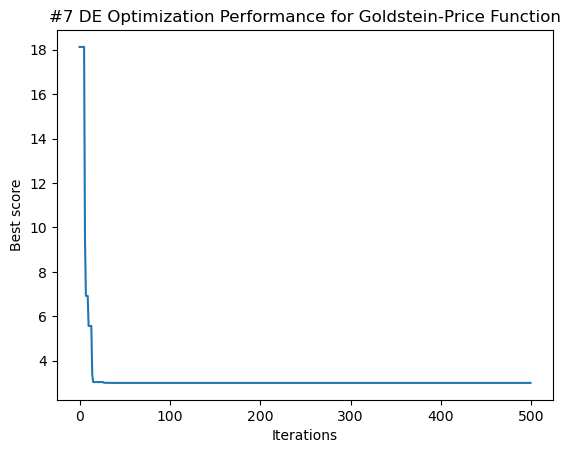

#8 Best solution: [-1.63447483e-09 -9.99999999e-01], Best score: 3.00000, Time taken: 0.06238 seconds


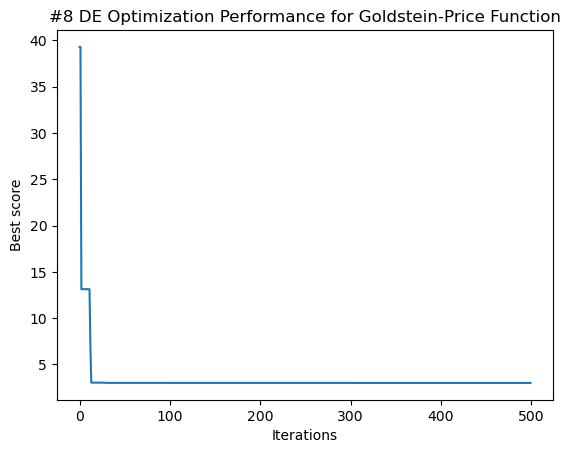

#9 Best solution: [-2.44923243e-10 -1.00000000e+00], Best score: 3.00000, Time taken: 0.06717 seconds


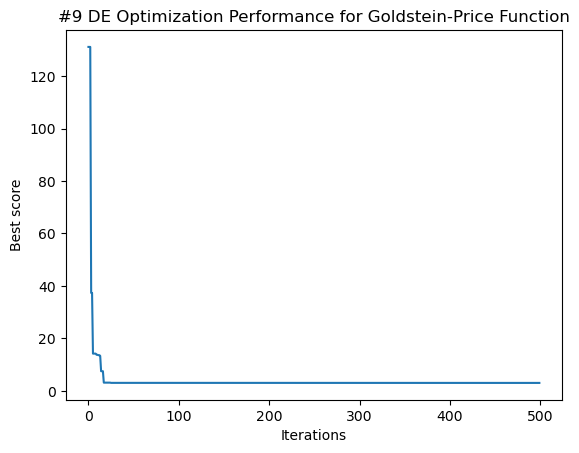

#10 Best solution: [ 1.26151972e-09 -1.00000000e+00], Best score: 3.00000, Time taken: 0.04220 seconds


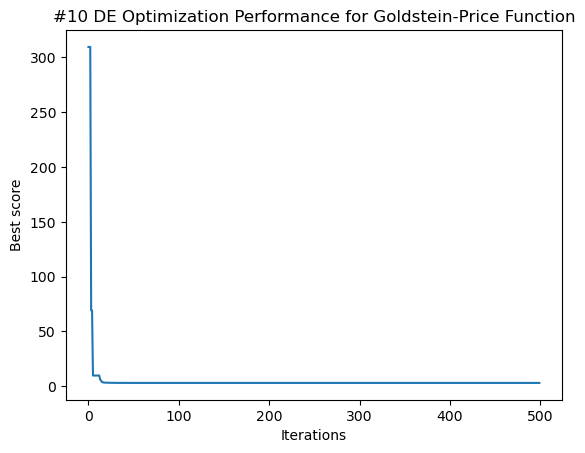

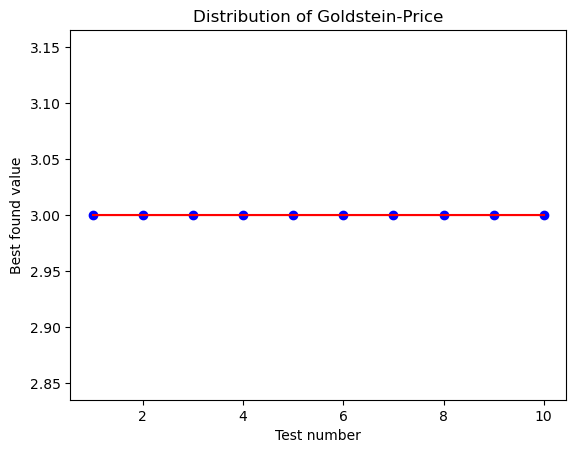

Dispersion is 7.888609052210118e-32


In [20]:
# Optimize Goldstein-Price function
print("Optimizing Goldstein-Price function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, goldstein_price_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Goldstein-Price Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Goldstein-Price")
print("Dispersion is " + str(np.var(best_values)))

In [21]:
@jit(nopython=True)
def zakharov_function(x):
    return np.sum(x**2) + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**2 + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**4

Optimizing Zakharov function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [-1.97095549e-39  6.55129461e-41], Best score: 0.00000, Time taken: 2.62481 seconds


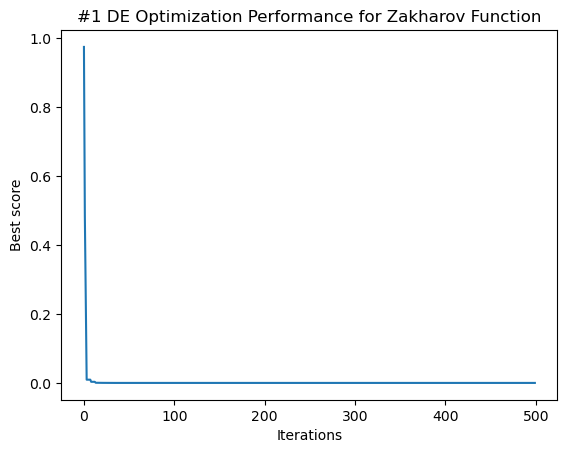

#2 Best solution: [-1.59575256e-40 -1.83689807e-40], Best score: 0.00000, Time taken: 0.06184 seconds


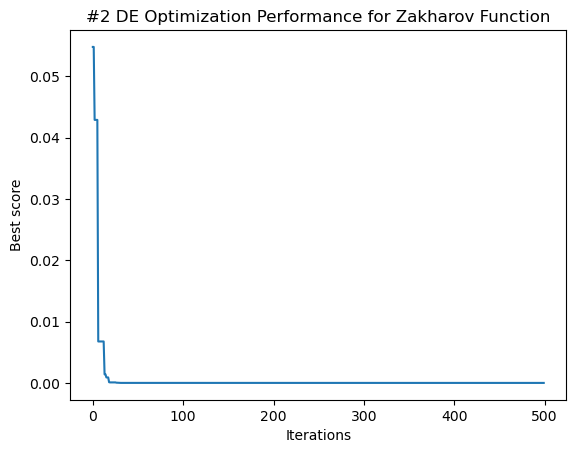

#3 Best solution: [-1.13610789e-39  2.19863417e-40], Best score: 0.00000, Time taken: 0.05329 seconds


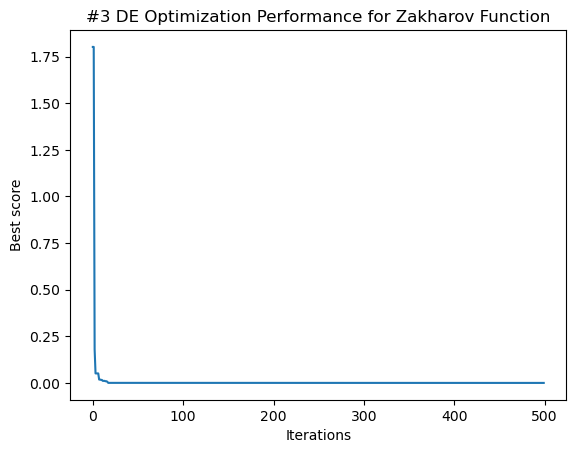

#4 Best solution: [-1.29808270e-39 -3.16120694e-40], Best score: 0.00000, Time taken: 0.06321 seconds


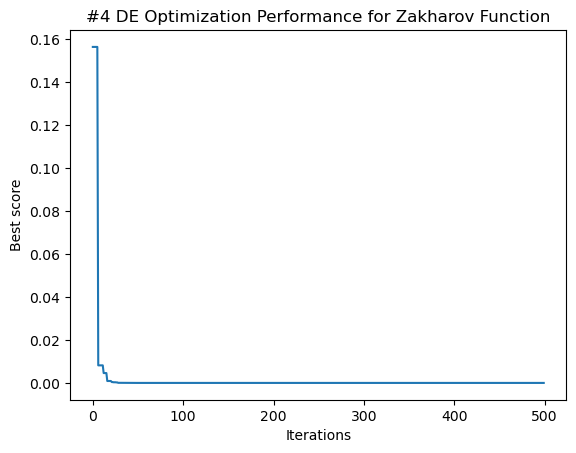

#5 Best solution: [ 2.34671753e-40 -1.18493272e-40], Best score: 0.00000, Time taken: 0.05179 seconds


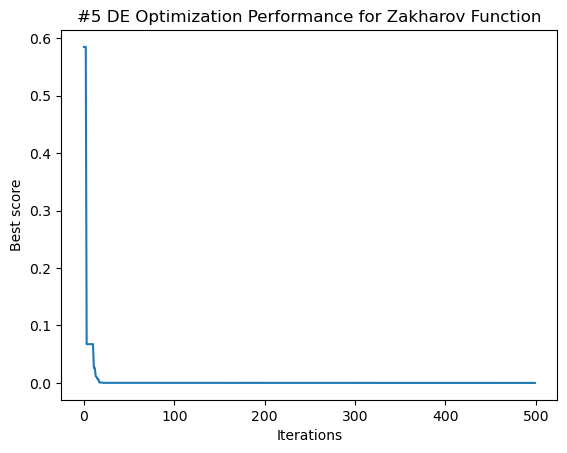

#6 Best solution: [ 6.42757415e-40 -7.12130060e-40], Best score: 0.00000, Time taken: 0.09240 seconds


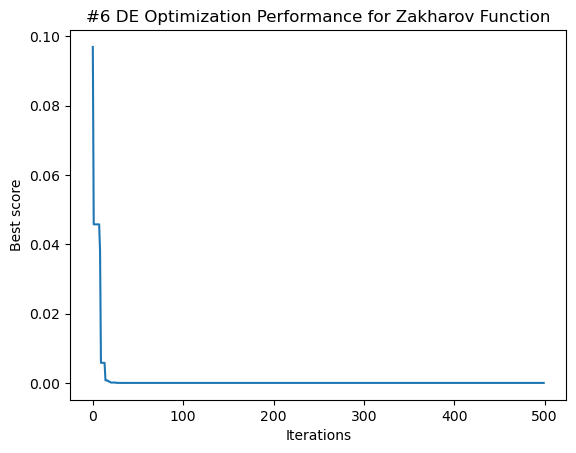

#7 Best solution: [-9.32988109e-40  1.44232091e-39], Best score: 0.00000, Time taken: 0.05429 seconds


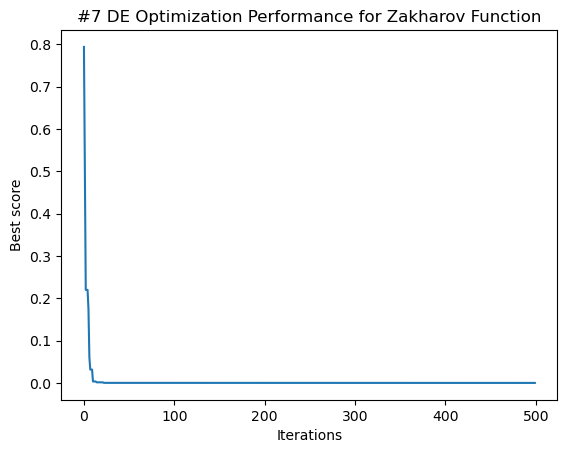

#8 Best solution: [ 1.06896487e-40 -1.13410347e-40], Best score: 0.00000, Time taken: 0.05102 seconds


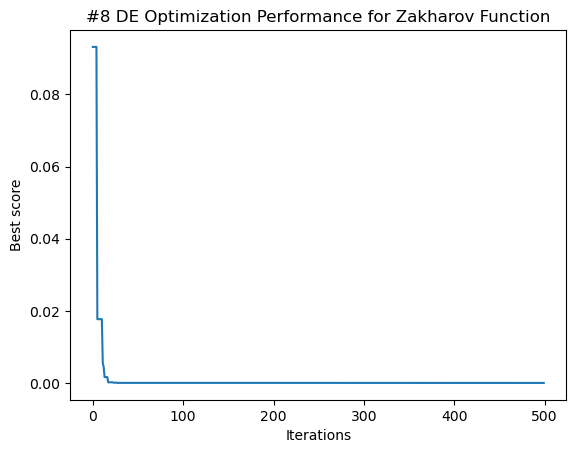

#9 Best solution: [-3.56738266e-39 -6.61391429e-41], Best score: 0.00000, Time taken: 0.05609 seconds


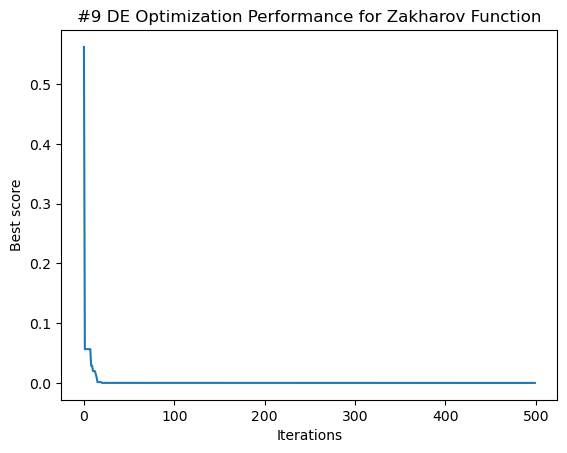

#10 Best solution: [1.20760635e-40 2.61263828e-40], Best score: 0.00000, Time taken: 0.07311 seconds


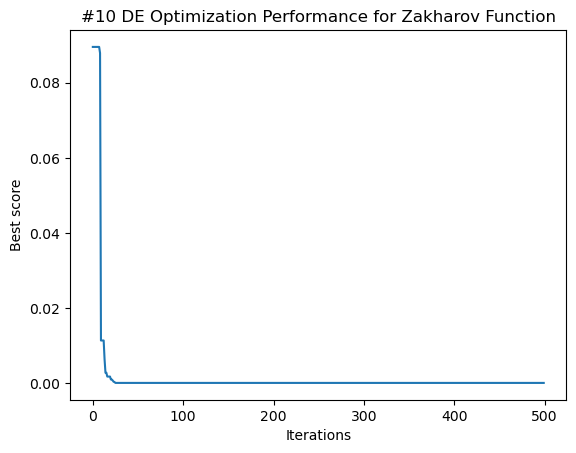

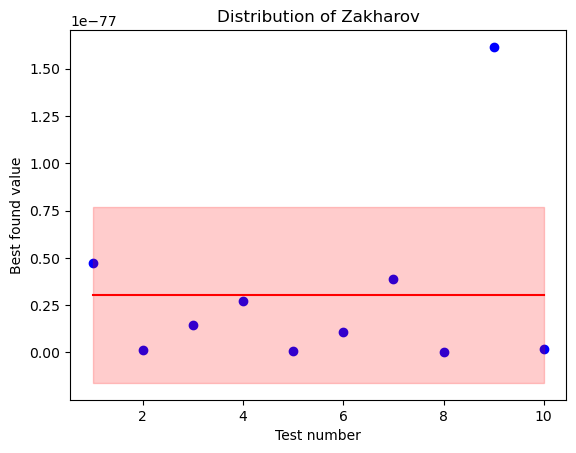

Dispersion is 2.1654333026907873e-155


In [22]:
# Optimize Zakharov function
print("Optimizing Zakharov function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, zakharov_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Zakharov Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Zakharov")
print("Dispersion is " + str(np.var(best_values)))

# Реализация на C

In [23]:
def c(file, name, types, result):
    path = os.path.abspath(file)
    module = ctypes.cdll.LoadLibrary(path)
    func = module[name]
    func.argtypes = types
    func.restype = result
    return func


function_type = ctypes.CFUNCTYPE(ctypes.c_float, ctypes.POINTER(ctypes.c_float))

de_optimizer_c = c(
    "C:/Users/7germ/OneDrive/Рабочий стол/DEonC/libcode.dll",
    "de_optimizer",
    (
        function_type,
        (ctypes.c_float * 2) * MAX_DIMENSIONS,
        ctypes.c_int,
        ctypes.c_int,
        ctypes.c_int,
        ctypes.c_float,
        ctypes.c_float,
    ),
    ctypes.POINTER(ctypes.c_float)
)

In [24]:
def testing(func, bounds, n_dims, pop_size, max_iter, f, cr, func_name):
    print(f"Optimizing {func_name} function")
    best_values = []
    time_average = 0.0
    for i in range(TESTS_AMOUNT):
        start_time = time.perf_counter()
        result = de_optimizer_c(func, bounds, n_dims, pop_size, max_iter, f, cr)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        time_average += elapsed_time
        print(
            f"#{i + 1} Best solution: {result[0], result[1]}, Best score: {result[2]:.5f}, Time taken: {elapsed_time:.5f} seconds")
        best_values.append(result[2])
    times.append(time_average / TESTS_AMOUNT)
    draw_distribution_graphic(best_values, TESTS_AMOUNT, func_name)
    print("Dispersion is " + str(np.var(best_values)))

# Функции для тестирования

In [25]:
def rosenbrock_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

Optimizing Rosenbrock function
#1 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.75787 seconds
#2 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.81268 seconds
#3 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.72100 seconds
#4 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.73096 seconds
#5 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.90714 seconds
#6 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.81588 seconds
#7 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.67039 seconds
#8 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.68446 seconds
#9 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.62728 seconds
#10 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.59805 seconds


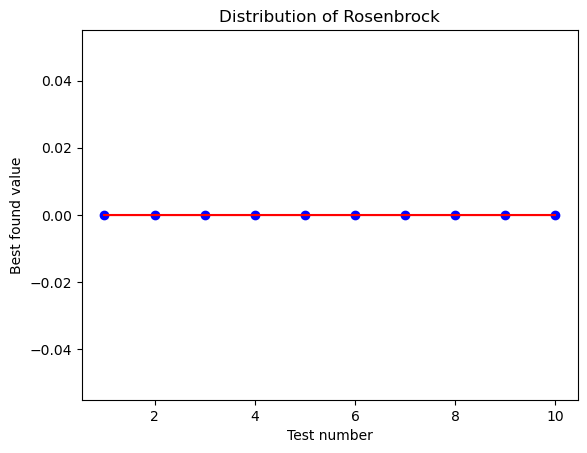

Dispersion is 0.0


In [26]:
# Optimize Rosenbrock function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
callback_pointer = function_type(rosenbrock_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Rosenbrock")

In [27]:
def de_jong_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(x**2.0)

dimensions number: 2
population size: 50
generations number: 500
Optimizing De Jong (Sphere) function
#1 Best solution: (-2.8839492517431838e-24, -2.5858734255399932e-23), Best score: 0.00000, Time taken: 0.54843 seconds
#2 Best solution: (1.996475684659752e-23, 1.809342731811948e-23), Best score: 0.00000, Time taken: 0.45969 seconds
#3 Best solution: (5.624237466314759e-24, -1.723494470484728e-23), Best score: 0.00000, Time taken: 0.40958 seconds
#4 Best solution: (1.7352024284956563e-23, 1.6766866198125342e-23), Best score: 0.00000, Time taken: 0.40012 seconds
#5 Best solution: (-8.39838359093842e-24, 1.2073680237475872e-23), Best score: 0.00000, Time taken: 0.49797 seconds
#6 Best solution: (-1.4370305190342097e-23, 2.2416612270671327e-23), Best score: 0.00000, Time taken: 0.36452 seconds
#7 Best solution: (-2.235826180723394e-23, 1.2780152509755601e-23), Best score: 0.00000, Time taken: 0.39566 seconds
#8 Best solution: (-6.2033292127848304e-24, -2.0098771692620087e-23), Best score

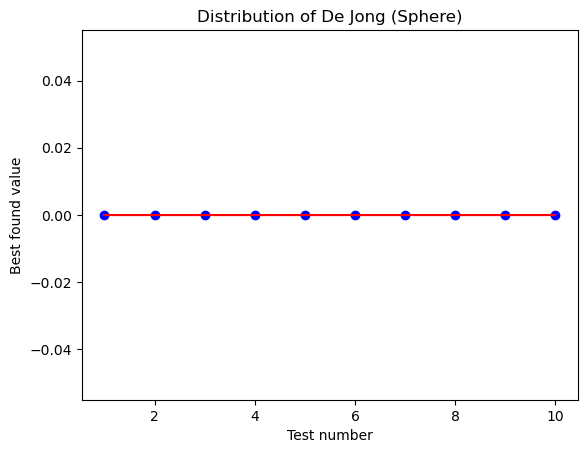

Dispersion is 0.0


In [28]:
# Optimize De Jong (Sphere) function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(de_jong_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "De Jong (Sphere)")

In [29]:
def schwefel_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    x = np.clip(x, -500.0, 500.0)
    return np.sum(x * np.sin(np.sqrt(np.abs(x))))

dimensions number: 2
population size: 50
generations number: 500
Optimizing Schwefel function
#1 Best solution: (-420.9651794433594, -420.9621276855469), Best score: -837.96588, Time taken: 1.18722 seconds
#2 Best solution: (-420.9621276855469, -420.9690856933594), Best score: -837.96588, Time taken: 1.52008 seconds
#3 Best solution: (-420.9622802734375, -420.97503662109375), Best score: -837.96588, Time taken: 1.23305 seconds
#4 Best solution: (-420.9690856933594, -420.9721374511719), Best score: -837.96588, Time taken: 1.36263 seconds
#5 Best solution: (-420.9690856933594, -420.9743347167969), Best score: -837.96588, Time taken: 1.38720 seconds
#6 Best solution: (-420.96533203125, -420.9622802734375), Best score: -837.96588, Time taken: 1.04509 seconds
#7 Best solution: (-420.9690856933594, -420.9682312011719), Best score: -837.96588, Time taken: 1.33014 seconds
#8 Best solution: (-420.9651794433594, -420.9690856933594), Best score: -837.96588, Time taken: 1.29116 seconds
#9 Best sol

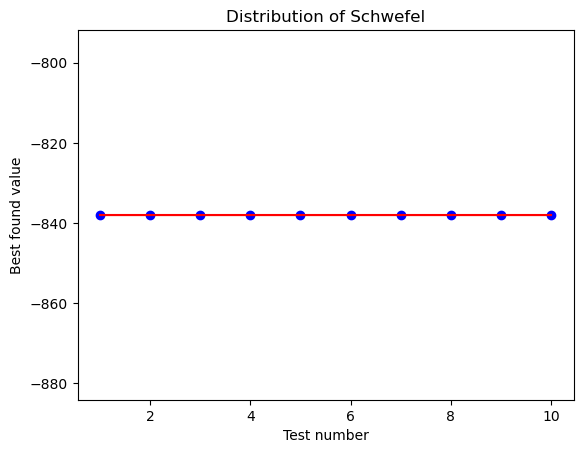

Dispersion is 0.0


In [30]:
# Optimize Schwefel function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -500.0
bounds[0][1] = 500.0
bounds[1][0] = -500.0
bounds[1][1] = 500.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(schwefel_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Schwefel")

In [31]:
def sum_of_different_powers_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(np.abs(x)**(np.arange(len(x)) + 1.0))

dimensions number: 2
population size: 50
generations number: 500
Optimizing Sum of Different Powers function
#1 Best solution: (0.0, 4.8975955984103385e-24), Best score: 0.00000, Time taken: 0.66948 seconds
#2 Best solution: (0.0, 5.2772672523450645e-24), Best score: 0.00000, Time taken: 0.67649 seconds
#3 Best solution: (0.0, -1.2361557669896365e-23), Best score: 0.00000, Time taken: 0.49673 seconds
#4 Best solution: (0.0, 9.40796777744027e-24), Best score: 0.00000, Time taken: 0.53156 seconds
#5 Best solution: (0.0, 1.509516896576615e-24), Best score: 0.00000, Time taken: 0.57718 seconds
#6 Best solution: (0.0, -5.910612907571711e-24), Best score: 0.00000, Time taken: 0.60880 seconds
#7 Best solution: (0.0, -1.4517079072645708e-23), Best score: 0.00000, Time taken: 0.57852 seconds
#8 Best solution: (0.0, -1.1538723680931105e-23), Best score: 0.00000, Time taken: 0.65491 seconds
#9 Best solution: (0.0, -4.225656501117564e-24), Best score: 0.00000, Time taken: 1.01731 seconds
#10 Best 

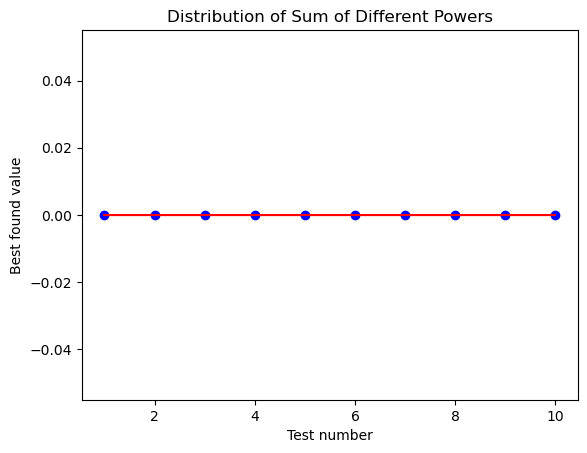

Dispersion is 0.0


In [32]:
# Optimize Sum of Different Powers function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(sum_of_different_powers_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Sum of Different Powers")

In [33]:
def booth_function(x):
    return (x[0] + 2.0*x[1] - 7.0)**2.0 + (2.0*x[0] + x[1] - 5.0)**2.0

dimensions number: 2
population size: 50
generations number: 500
Optimizing Booth function
#1 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.04766 seconds
#2 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03322 seconds
#3 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03163 seconds
#4 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03221 seconds
#5 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03800 seconds
#6 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03665 seconds
#7 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03855 seconds
#8 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.02709 seconds
#9 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.02992 seconds
#10 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03131 seconds


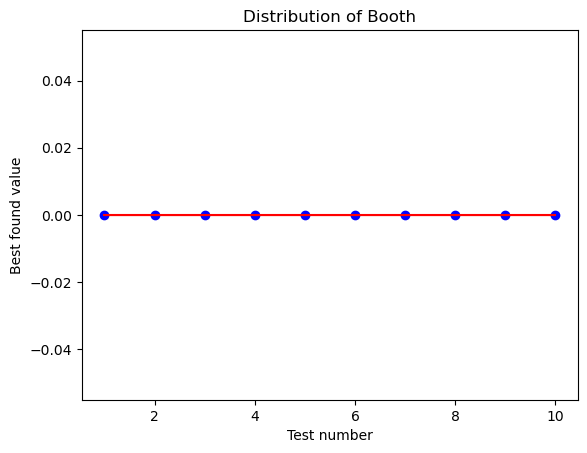

Dispersion is 0.0


In [34]:
# Optimize Booth function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(booth_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Booth")

In [35]:
def beale_function(x):
    return (1.5 - x[0] + x[0]*x[1])**2.0 + (2.25 - x[0] + x[0]*x[1]**2.0)**2.0 + (2.625 - x[0] + x[0]*x[1]**3.0)**2.0

dimensions number: 2
population size: 50
generations number: 500
Optimizing Beale function
#1 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.07473 seconds
#2 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.04719 seconds
#3 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.04413 seconds
#4 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.05785 seconds
#5 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.06645 seconds
#6 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.07927 seconds
#7 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.07516 seconds
#8 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.07903 seconds
#9 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.08413 seconds
#10 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.09089 seconds


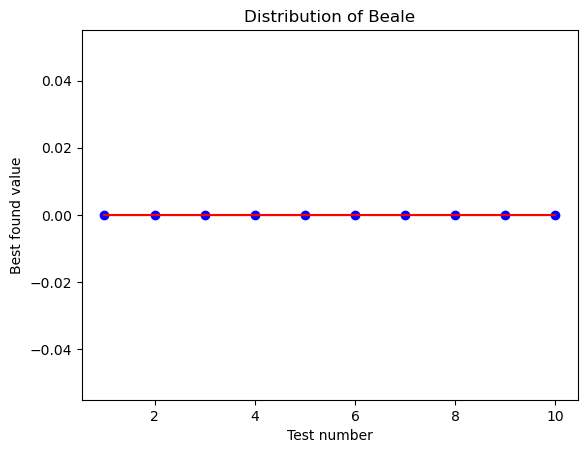

Dispersion is 0.0


In [36]:
# Optimize Beale function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(beale_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Beale")

In [37]:
def goldstein_price_function(x):
    return (1.0 + (x[0] + x[1] + 1.0)**2.0 * (19.0 - 14.0*x[0] + 3.0*x[0]**2.0 - 14.0*x[1] + 6.0*x[0]*x[1] + 3.0*x[1]**2.0)) * \
           (30.0 + (2.0*x[0] - 3.0*x[1])**2.0 * (18.0 - 32.0*x[0] + 12.0*x[0]**2.0 + 48.0*x[1] - 36.0*x[0]*x[1] + 27.0*x[1]**2.0))

dimensions number: 2
population size: 50
generations number: 500
Optimizing Goldstein-Price function
#1 Best solution: (2.6308553060516715e-06, -0.9999864101409912), Best score: 3.00000, Time taken: 0.12393 seconds
#2 Best solution: (-1.754183176672086e-05, -0.999998152256012), Best score: 3.00000, Time taken: 0.12771 seconds
#3 Best solution: (1.5194731531664729e-05, -0.9999962449073792), Best score: 3.00000, Time taken: 0.13894 seconds
#4 Best solution: (-1.2616015737876296e-05, -0.9999980926513672), Best score: 3.00000, Time taken: 0.12489 seconds
#5 Best solution: (-6.109126843512058e-06, -1.0000015497207642), Best score: 3.00000, Time taken: 0.12113 seconds
#6 Best solution: (-1.1814976460300386e-05, -0.9999988079071045), Best score: 3.00000, Time taken: 0.07577 seconds
#7 Best solution: (-1.598679955350235e-05, -0.9999963045120239), Best score: 3.00000, Time taken: 0.11557 seconds
#8 Best solution: (-1.4197605196386576e-05, -1.0000131130218506), Best score: 3.00000, Time taken: 0

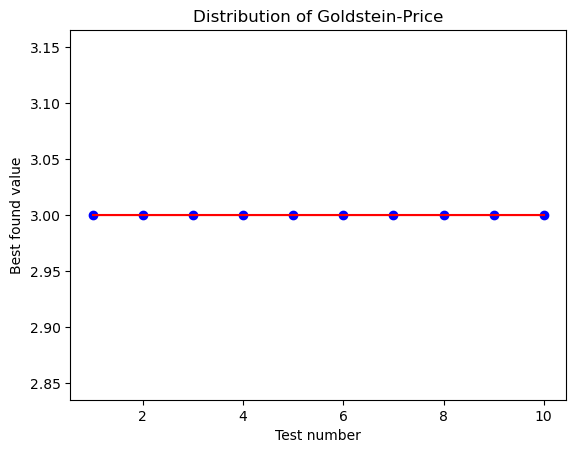

Dispersion is 0.0


In [38]:
# Optimize Goldstein-Price function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(goldstein_price_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Goldstein-Price")

In [39]:
def zakharov_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(x**2) + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**2 + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**4

dimensions number: 2
population size: 50
generations number: 500
Optimizing Zakharov function
#1 Best solution: (1.3587113039586004e-23, -7.400196866795202e-24), Best score: 0.00000, Time taken: 1.16003 seconds
#2 Best solution: (-2.109975729525503e-23, 2.01688509399963e-23), Best score: 0.00000, Time taken: 1.13142 seconds
#3 Best solution: (1.05478970290336e-23, -3.0740394863524806e-24), Best score: 0.00000, Time taken: 1.29341 seconds
#4 Best solution: (-9.420479111397076e-24, -1.2471464926655377e-24), Best score: 0.00000, Time taken: 1.35123 seconds
#5 Best solution: (2.0482707139747533e-23, 9.446868086398529e-24), Best score: 0.00000, Time taken: 1.13978 seconds
#6 Best solution: (-1.2230120821312061e-23, -5.371372836311595e-24), Best score: 0.00000, Time taken: 1.16096 seconds
#7 Best solution: (-1.6549437199984705e-23, -1.5437272696811535e-23), Best score: 0.00000, Time taken: 1.04380 seconds
#8 Best solution: (-7.382475895420317e-24, 4.661868182712196e-24), Best score: 0.00000,

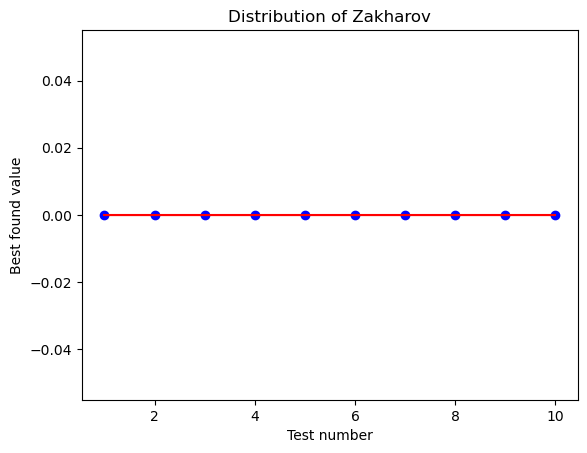

Dispersion is 0.0


In [40]:
# Optimize Zakharov function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(zakharov_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Zakharov")

In [41]:
def plot_barchart(array1, array2):
    x_labels = ["Rosenbrock function", "De Jong (Sphere) function", "Schwefel test", 
                "Sum of Different Powers function", "Booth test", "Beale function", 
                "Goldstein-Price function", "Zakharov function"]
    x_pos = np.arange(len(x_labels))
    fig, ax = plt.subplots()
    ax.bar(x_pos - 0.22, array1, 0.44, label="Python with Numba")
    ax.bar(x_pos + 0.22, array2, 0.44, label="C realization")
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels, rotation=45, ha='right')
    ax.set_ylabel("Time")
    ax.legend()
    for i in range(len(array1)):
        ax.text(i-0.22, array1[i]+0.005, str(round(array1[i], 4)), color='black', 
                fontweight='bold', fontsize=6, ha='center', va='bottom')
        ax.text(i+0.22, array2[i]+0.005, str(round(array2[i], 4)), color='black', 
                fontweight='bold', fontsize=6, ha='center', va='bottom')
    plt.subplots_adjust(top=0.9)
    plt.show()

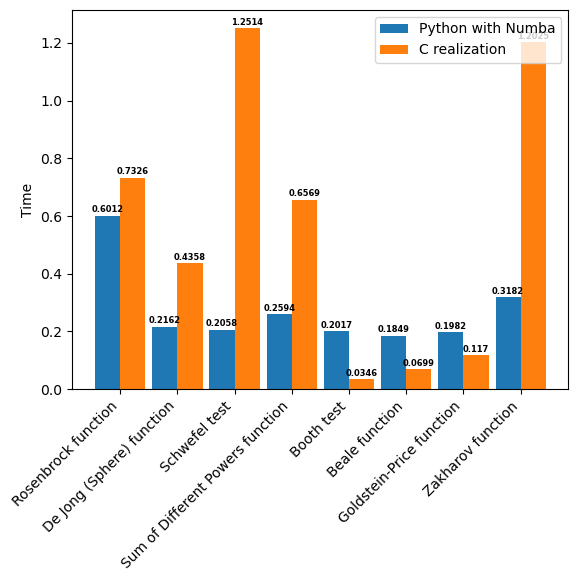

In [42]:
times = np.array(times)
plot_barchart(times_py, times)

# Тестирование на многомерных функциях и сравнение с реализацией без использования Numba

In [43]:
def draw_comparsion_graphic(best_values_original, best_values_numba, iterations_number, function_name):
    x = np.array([i for i in range(1, iterations_number + 1)])
    plt.title("Performance of " + function_name)
    plt.xlabel("Iteration number")
    plt.ylabel("Functional value")
    plt.plot(x, best_values_original, color="blue", label="Original")
    plt.plot(x, best_values_numba, color="red", label="with Numba")
    plt.grid(color="green", linestyle="--", linewidth=0.5)
    plt.legend(loc="upper right")
    plt.show()

In [44]:
def find_best_values(func, bounds, n_dims, pop_size, max_iter, f, cr, func_name):
    print(f"Optimizing {func_name} function")
    best_values = []
    time_average = 0.0
    for i in range(TESTS_AMOUNT):
        start_time = time.perf_counter()
        best_solution, best_score, _ = de_optimizer(func, bounds, pop_size, max_iter, f, cr)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        time_average += elapsed_time
        print(
            f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
        best_values.append(best_score)
    return best_values, time_average / TESTS_AMOUNT

In [45]:
def find_best_values_(func, bounds, n_dims, pop_size, max_iter, f, cr, func_name):
    print(f"Optimizing {func_name} function")
    best_values = []
    time_average = 0.0
    for i in range(TESTS_AMOUNT):
        start_time = time.perf_counter()
        best_solution, best_score, _ = de_optimizer_(func, bounds, pop_size, max_iter, f, cr)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        time_average += elapsed_time
        print(
            f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
        best_values.append(best_score)
    return best_values, time_average / TESTS_AMOUNT

### Реализация без использования Numba

In [46]:
def rand_1_bin_(population, F, CR):
    """
    rand/1/bin DE variant
    """
    n = population.shape[0]
    D = population.shape[1]
    v = np.zeros((n, D))
    for i in range(n):
        # Select three different individuals at random
        idxs = np.random.choice(n, 3, replace=False)
        a, b, c = population[idxs]
        # Generate mutant vector
        mutant = a + F*(b - c)
        # Generate trial vector
        jrand = np.random.randint(D)
        trial = np.zeros(D)
        # Select trial vector between mutant or just from population
        for j in range(D):
            if np.random.rand() < CR or j == jrand:
                trial[j] = mutant[j]
            else:
                trial[j] = population[i, j]
        v[i] = trial
    return v

def de_optimizer_(objective_function, bounds, pop_size=50, max_iter=1000, F=0.8, CR=0.9):
    """
    Differential Evolution optimizer
    """
    n_dims = len(bounds)
    # Initialize population
    population = np.zeros((pop_size, n_dims))
    for i in range(pop_size):
        for j in range(n_dims):
            population[i, j] = bounds[j, 0] + np.random.rand()*(bounds[j, 1] - bounds[j, 0])
    # Evaluate initial population
    scores = np.zeros(pop_size)
    for i in range(pop_size):
        scores[i] = objective_function(population[i])
    # Find best individual in initial population
    best_idx = np.argmin(scores)
    best = population[best_idx]

    # Initialize performance graph data
    performance = []

    # Main loop
    for i in range(max_iter):
        # Generate new population
        v = rand_1_bin_(population, F, CR)
        # Evaluate new population
        new_scores = np.zeros(pop_size)
        for j in range(pop_size):
            new_scores[j] = objective_function(v[j])
        # Replace old population with new population if better
        for j in range(pop_size):
            if new_scores[j] < scores[j]:
                population[j] = v[j]
                scores[j] = new_scores[j]
        # Update best individual
        new_best_idx = np.argmin(scores)
        if scores[new_best_idx] < scores[best_idx]:
            best_idx = new_best_idx
            best = population[best_idx]

        # Record the best score in this iteration for performance graph
        performance.append(scores[best_idx])

    return best, scores[best_idx], performance

## Многомерная функция

In [47]:
@jit(nopython=True)
def a_lot_dimensions(arguments):
    arguments = np.clip(arguments, -5.0, 5.0)
    return sum([arguments[i] ** 2 for i in range(256)])

In [48]:
def a_lot_dimensions_(arguments):
    arguments = np.clip(arguments, -5.0, 5.0)
    return sum([arguments[i] ** 2 for i in range(256)])

dimensions number: 256
population size: 100
generations number: 10000
Optimizing Sphere function (256 dims) with Numba function
#1 Best solution: [-0.59749676 -0.46392537  0.53254001  0.00343158 -0.25919118  1.24990754
 -1.16900361 -0.4586611  -0.20094896  0.05454305  0.17186156  0.26307756
  0.33663456 -0.82876259 -0.3864916  -0.49404666  0.49767989 -1.14901722
 -1.59095896 -0.15384105  0.85768199  0.81539184 -0.4898174  -0.35771237
 -0.62376324  0.5100822  -0.093922   -0.40161929 -0.82099016 -0.03271505
  0.20694486 -0.21833967  0.99423511 -1.06181174  1.68417254  0.19877116
  1.74875809  0.17554202  0.25256517  0.45563567 -0.41525902  0.26414464
  0.09203989 -0.70152804 -1.42437292  1.41156744 -0.23978555 -1.30750361
 -0.08490892 -0.3098881   0.66345584  0.75082213  0.69024356  1.11567245
  0.02086373 -0.68229771 -1.09258927  0.07650167  0.96142    -0.42952441
 -0.30374527 -0.30626588 -0.47104719  0.46472595  0.42883204  0.43397055
  0.62372438  0.77199162 -0.10922893  0.40251446 -0

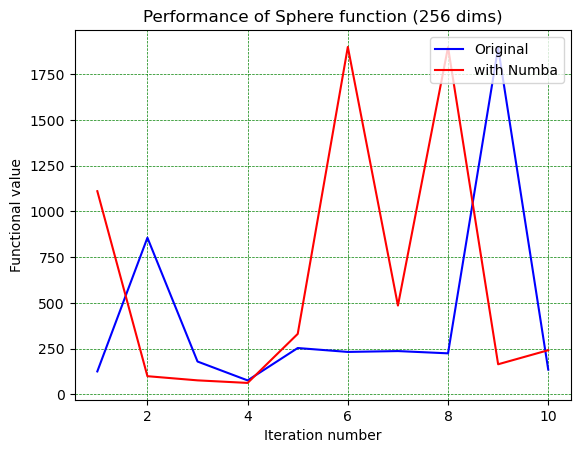

average time for Numba: 10.989542630012147
average time without Numba: 385.2890462699812


In [49]:
bounds = np.array([[-5, 5]] * 256)
print(f"dimensions number: {len(bounds)}")
print(f"population size: {100}")
print(f"generations number: {10000}")
best_values_numba, time_numba = find_best_values(a_lot_dimensions, bounds, 256, 100, 10000, 0.8, 0.9, "Sphere function (256 dims) with Numba")
best_values_nonumba, time_nonumba = find_best_values_(a_lot_dimensions_, bounds, 256, 100, 10000, 0.8, 0.9, "Sphere function (256 dims) without Numba")
draw_comparsion_graphic(best_values_numba, best_values_nonumba, TESTS_AMOUNT, "Sphere function (256 dims)")
print(f"average time for Numba: {time_numba}")
print(f"average time without Numba: {time_nonumba}")